# Endometrium analysis - clusters visualization

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import os
import sys
import rbcde

def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

def Barplot(which_var, adata, var='clusters', height=3, color = False):
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    if 'category' in plotdata.index.dtype.name:
        plotdata.index.reorder_categories(adata.obs[var].cat.categories[::-1])

    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel(var)
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
    ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+'.pdf', bbox_inches='tight',
                       dpi=300, orientation='landscape', format= 'pdf', optimize=True)
    
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './figures_primaryEpithelial_noCiliated/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

/home/jovyan/my-conda-envs/myenvSC/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


scanpy==1.4.4 anndata==0.6.22rc1 umap==0.3.10 numpy==1.17.5 scipy==1.3.0 pandas==0.25.3 scikit-learn==0.22.1 statsmodels==0.10.2 python-igraph==0.7.1 louvain==0.6.1


'/home/jovyan/my-conda-envs/myenvSC/bin/python'

## Load data

In [2]:
adata = sc.read('data/epithelial-noCilnoGland_freeze.h5ad')
adata.X.shape

(2892, 4304)

## Rename clusters

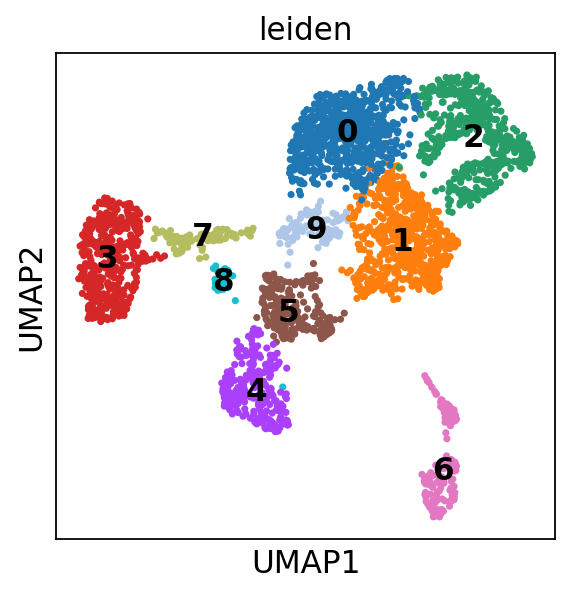

In [3]:
sc.pl.umap(adata, color=['leiden'], legend_loc="on data")

... storing 'clusters' as categorical


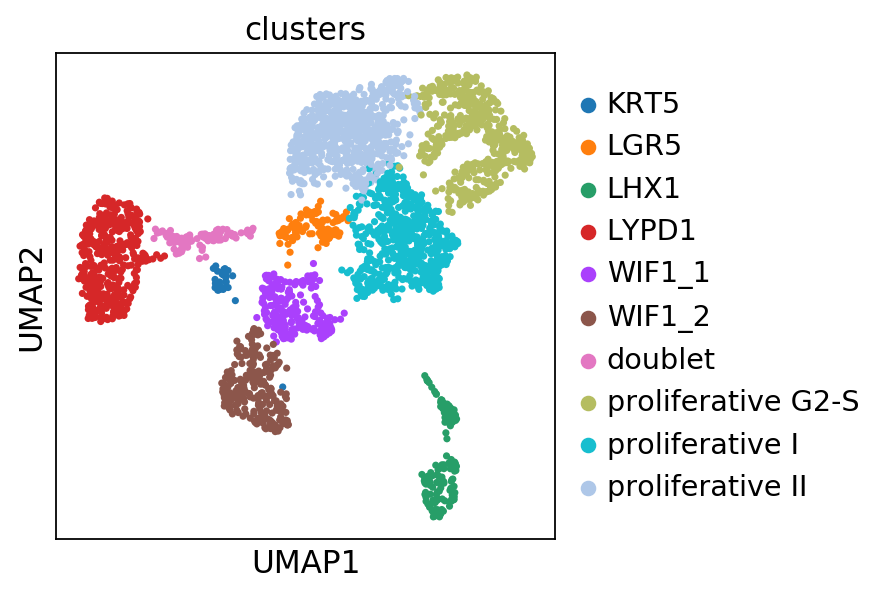

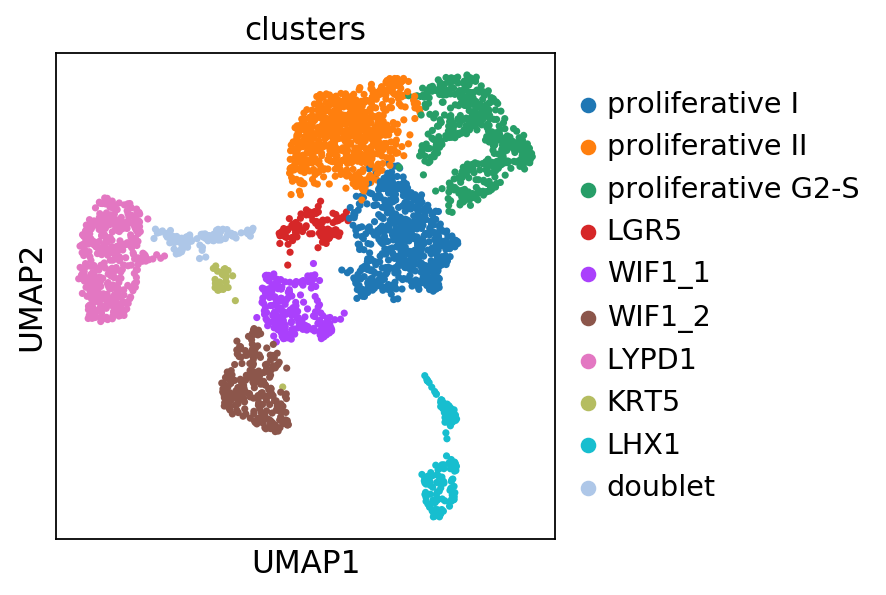

In [4]:
adata.obs['clusters'] = adata.obs['leiden'].tolist()
adata.obs.at[adata.obs['clusters'] == '0', 'clusters'] = 'proliferative II'
adata.obs.at[adata.obs['clusters'] == '1', 'clusters'] = 'proliferative I'
adata.obs.at[adata.obs['clusters'] == '2', 'clusters'] = 'proliferative G2-S'
adata.obs.at[adata.obs['clusters'] == '3', 'clusters'] = 'LYPD1'
adata.obs.at[adata.obs['clusters'] == '4', 'clusters'] = 'WIF1_2'
adata.obs.at[adata.obs['clusters'] == '5', 'clusters'] = 'WIF1_1'
adata.obs.at[adata.obs['clusters'] == '6', 'clusters'] = 'LHX1'
adata.obs.at[adata.obs['clusters'] == '7', 'clusters'] = 'doublet'
adata.obs.at[adata.obs['clusters'] == '8', 'clusters'] = 'KRT5'
adata.obs.at[adata.obs['clusters'] == '9', 'clusters'] = 'LGR5'
set(adata.obs['clusters'])
sc.pl.umap(adata, color=['clusters'])
# order 1 > 0 > 2 > 9 > 8 > 5 > 4 > 3 > 6
adata.obs['clusters'].cat.reorder_categories(['proliferative I', 'proliferative II', 'proliferative G2-S',
                                              'LGR5', 'WIF1_1', 'WIF1_2',
                                              'LYPD1', 'KRT5',  'LHX1', 
                                              'doublet'], inplace=True)
sc.pl.umap(adata, color=['clusters'])

## Change clusters colors

Choose the colors of the clusters a bit more consistently.

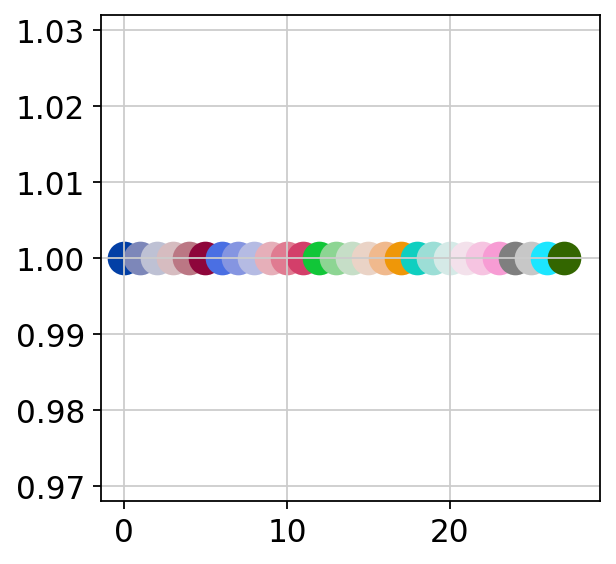

array(['#023fa5', '#7d87b9', '#bec1d4', '#d6bcc0', '#bb7784', '#8e063b',
       '#4a6fe3', '#8595e1', '#b5bbe3', '#e6afb9', '#e07b91', '#d33f6a',
       '#11c638', '#8dd593', '#c6dec7', '#ead3c6', '#f0b98d', '#ef9708',
       '#0fcfc0', '#9cded6', '#d5eae7', '#f3e1eb', '#f6c4e1', '#f79cd4',
       '#7f7f7f', '#c7c7c7', '#1CE6FF', '#336600'], dtype='<U7')

In [5]:
import matplotlib.pyplot as pl

for i in range(28):
    pl.scatter(i, 1, c=sc.pl.palettes.zeileis_26[i], s=200)
pl.show()
orig_colors = np.array(sc.pl.palettes.zeileis_26)
new_colors = orig_colors.copy()
new_colors

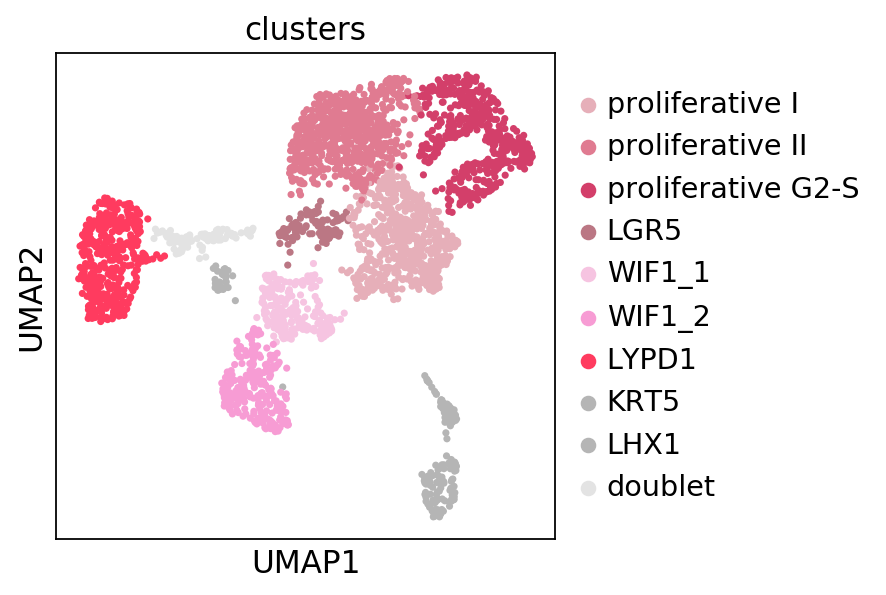

In [6]:
new_colors[[3]] =  orig_colors[[4]]  # mid / red
new_colors[[0, 1, 2]] =  orig_colors[[9, 10, 11]]  # mid / red
new_colors[[4, 5]] =  orig_colors[[22, 23]]  # mid / red
new_colors[[6]] =  '#ff3b5f' 
new_colors[[7]] =  '#b5b5b5'#orig_colors[[5]]  # mid / red
new_colors[[8]] = '#b5b5b5'#'#a82f72'
new_colors[[9]] =  '#e3e3e3'
adata.uns['clusters_colors'] = new_colors
sc.pl.umap(adata, color=['clusters'], save='_primaryepithelial_highres.pdf')

## Change metadata colors

In [7]:
# 'cycle_phase', 'type', 'treatment', 'phase']
# A3A8AD: per a Proliferatiu; CBTM; Collagenase; G1
# F9EE64: per a secretory; UB; Trypsin, G2M
# 48C7F4: per a S
print(adata.obs['cycle_phase'].cat.categories)
new_colors[[0, 1]] = [['#A3A8AD', '#F9EE64']]
adata.uns['cycle_phase_colors'] = new_colors

print(adata.obs['type'].cat.categories)
new_colors[[0, 1]] = [['#A3A8AD', '#F9EE64']]
adata.uns['type_colors'] = new_colors

print(adata.obs['treatment'].cat.categories)
new_colors[[0, 1]] = [['#A3A8AD', '#F9EE64']]
adata.uns['treatment_colors'] = new_colors

print(adata.obs['phase'].cat.categories)
new_colors[[0, 1, 2]] = [['#A3A8AD', '#F9EE64', '#48C7F4']]
adata.uns['phase_colors'] = new_colors

Index(['P', 'S'], dtype='object')
Index(['CBTM', 'UB'], dtype='object')
Index(['C', 'T'], dtype='object')
Index(['G1', 'G2M', 'S'], dtype='object')


## Save Stats

In [8]:
stats = adata.obs.clusters.values.describe()
stats.to_csv(str(sc.settings.figdir)+'/cluster_stats.csv')
adata.obs.to_csv(str(sc.settings.figdir)+'/barcode_metadata.csv')
adata.write('data/endometrium-N8-epithelial-clean_noCiliated_Luzprocessing_freeze_annot.h5ad')

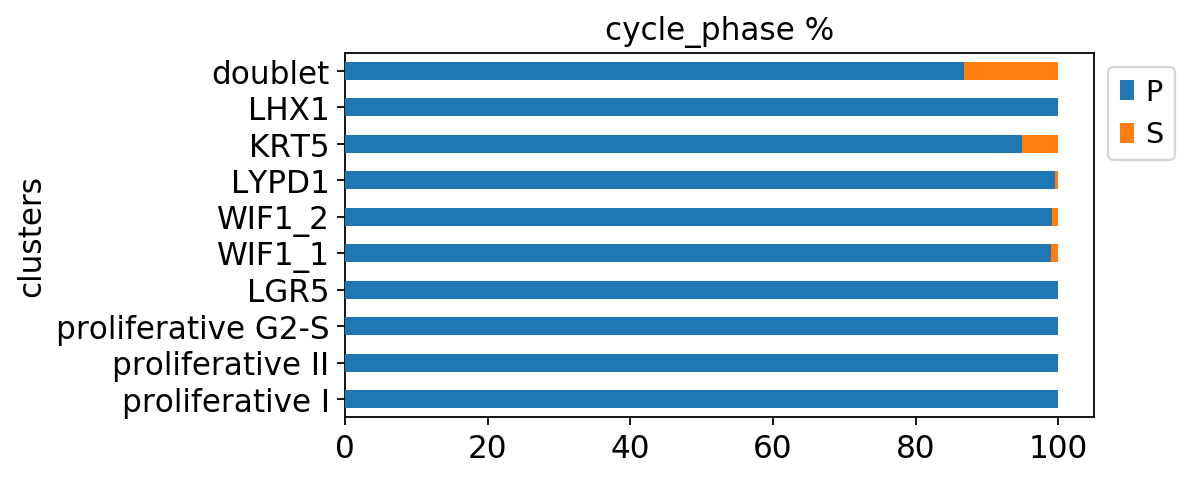

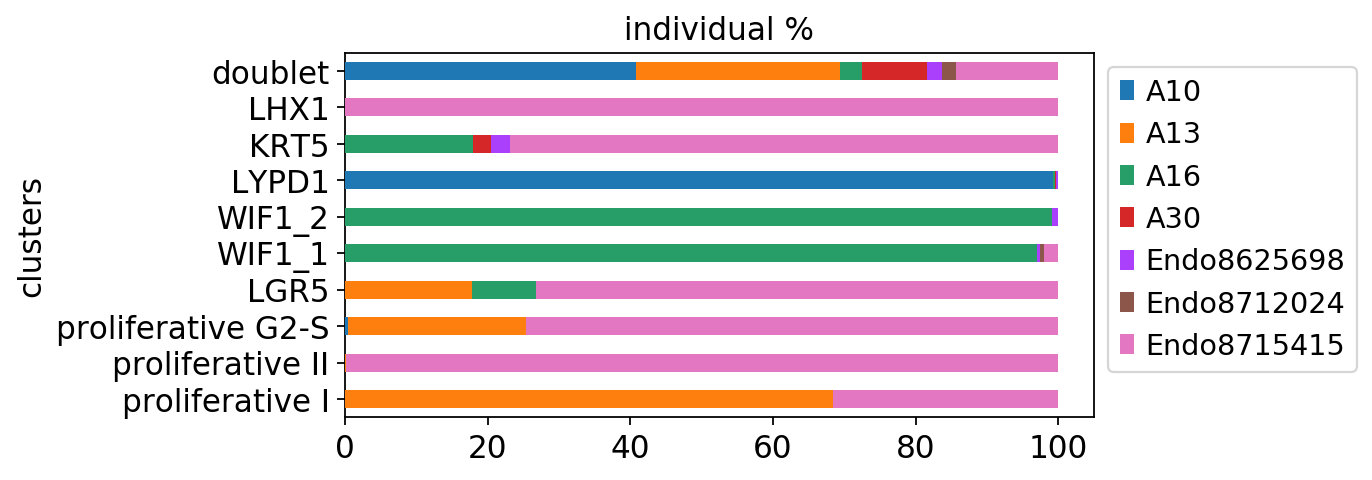

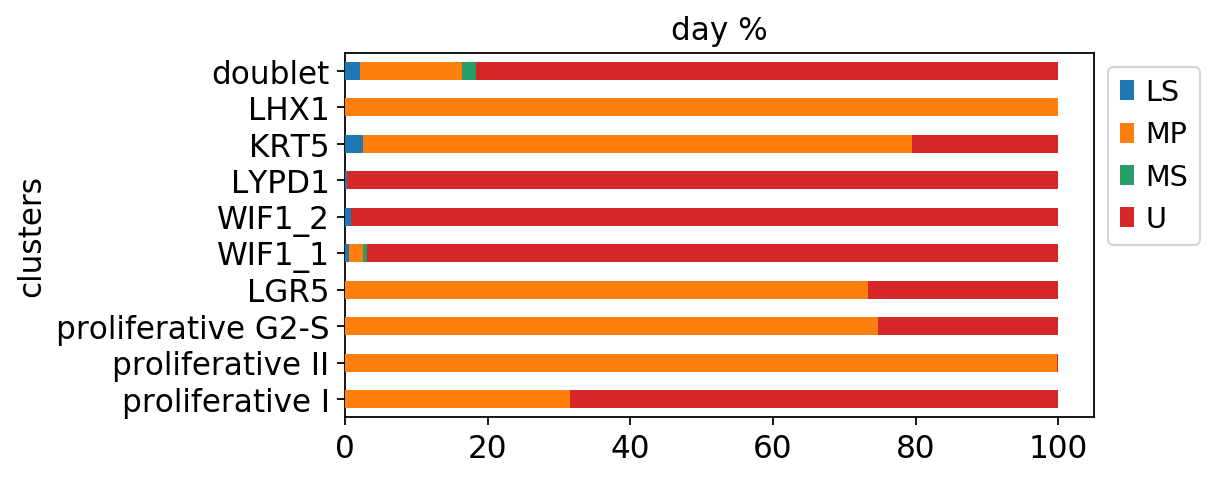

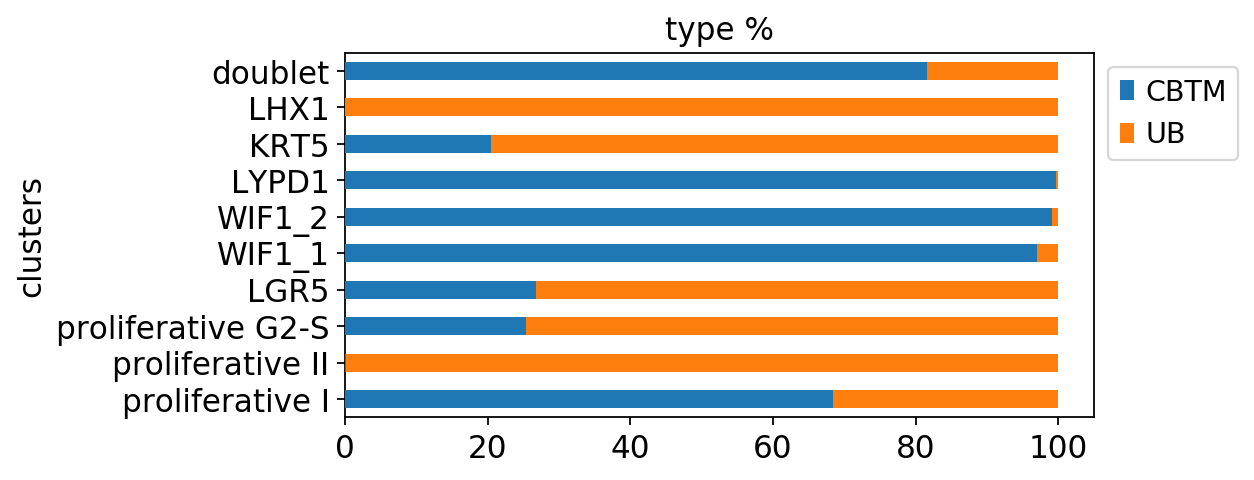

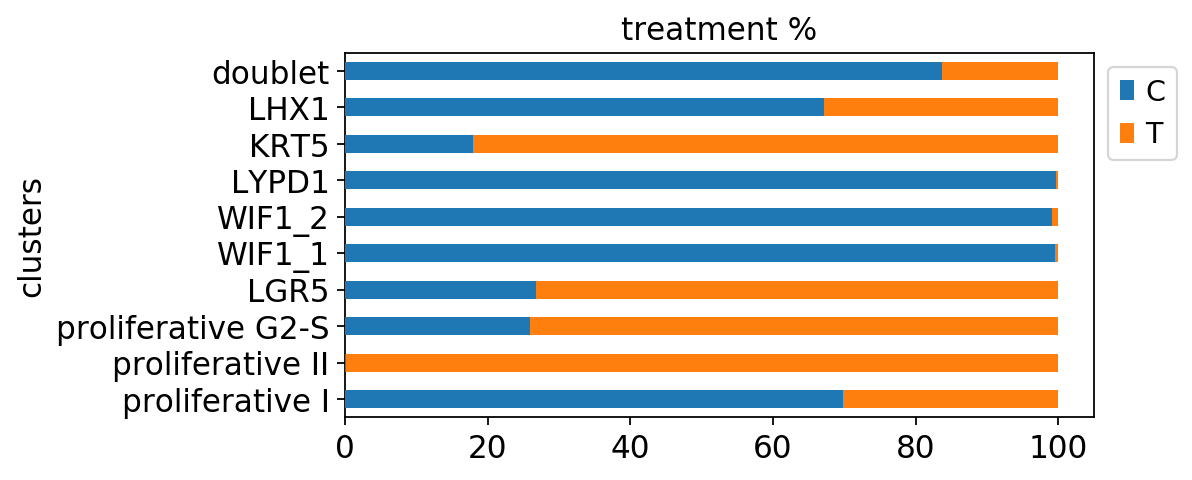

In [9]:
Barplot('cycle_phase', adata)
Barplot('individual', adata)
Barplot('day', adata)
Barplot('type', adata)
Barplot('treatment', adata)

Trying to set attribute `.obs` of view, making a copy.


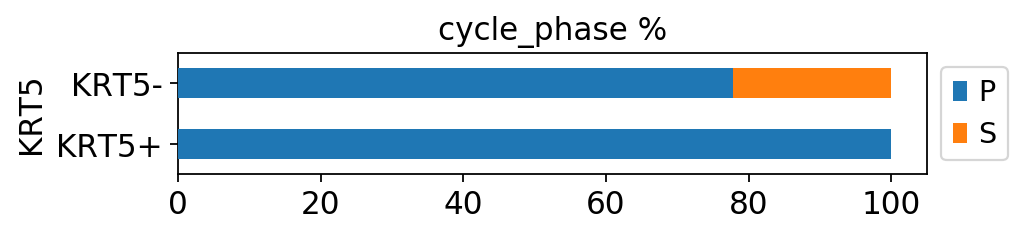

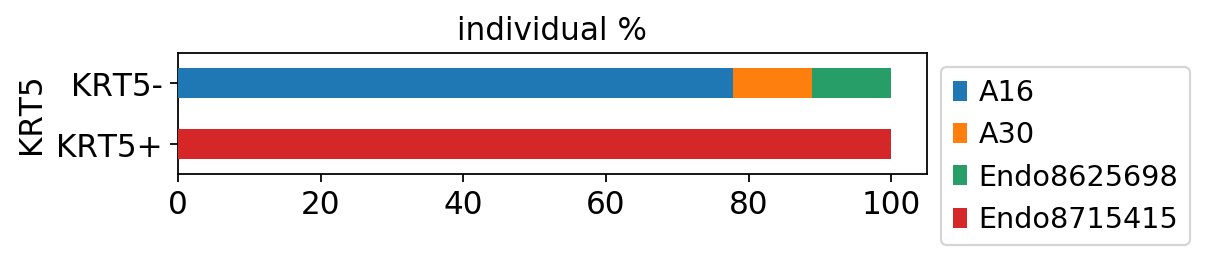

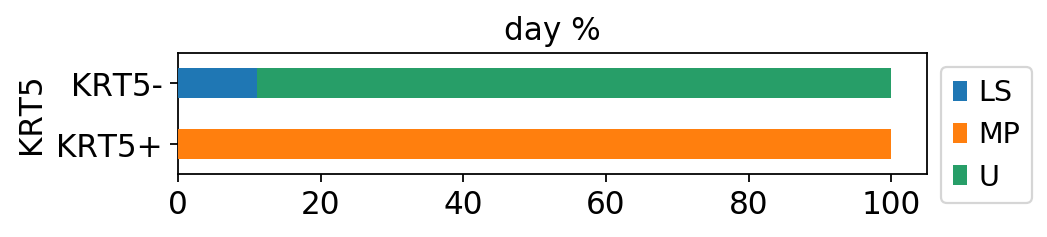

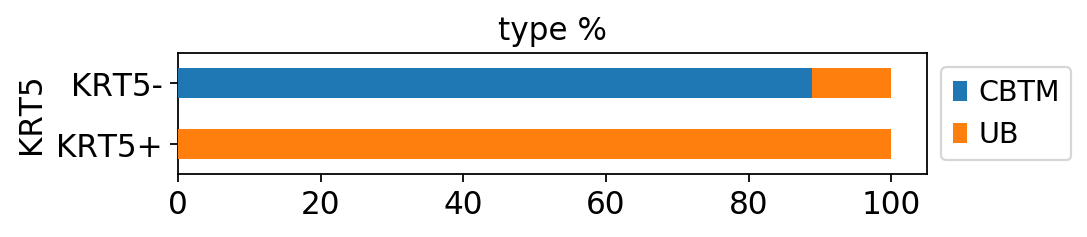

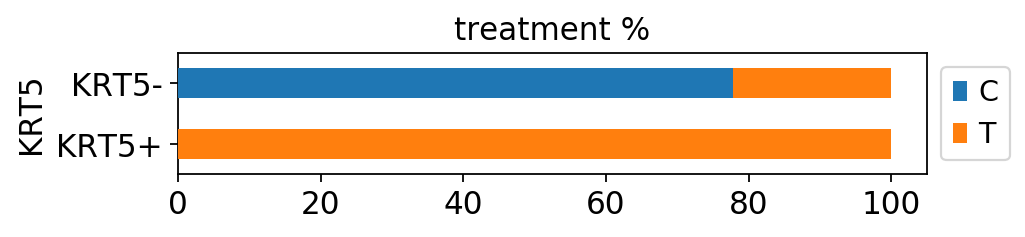

In [10]:
x = adata[[ i in ['KRT5'] for i in adata.obs['clusters'] ]]
x.obs['KRT5'] = 'KRT5-'
x.obs.at[  np.array([i>0 for i in x[:,'KRT5'].X ]) , 'KRT5'] = 'KRT5+'


Barplot('cycle_phase', x, 'KRT5', 1)
Barplot('individual', x, 'KRT5', 1)
Barplot('day', x, 'KRT5', 1)
Barplot('type', x, 'KRT5', 1)
Barplot('treatment', x, 'KRT5', 1)

Trying to set attribute `.obs` of view, making a copy.


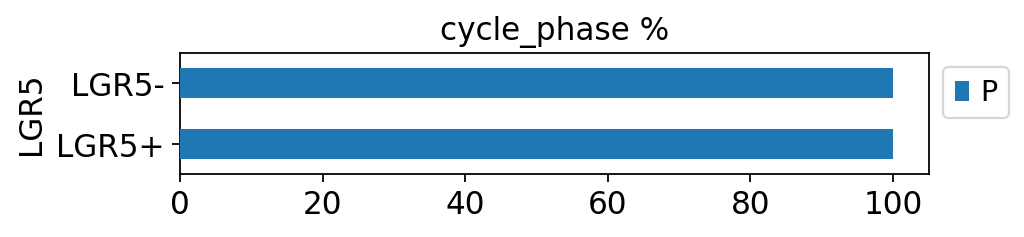

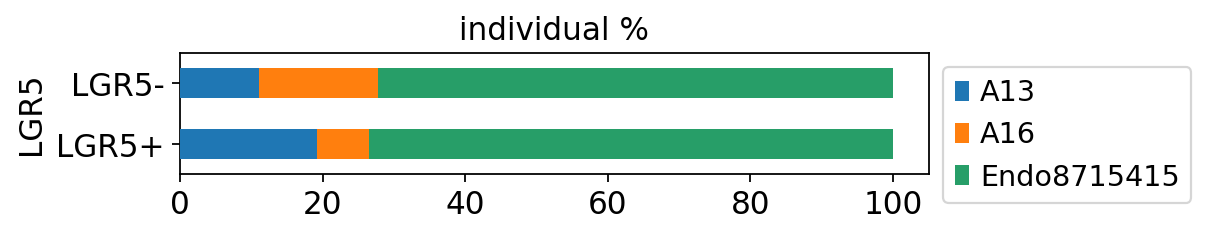

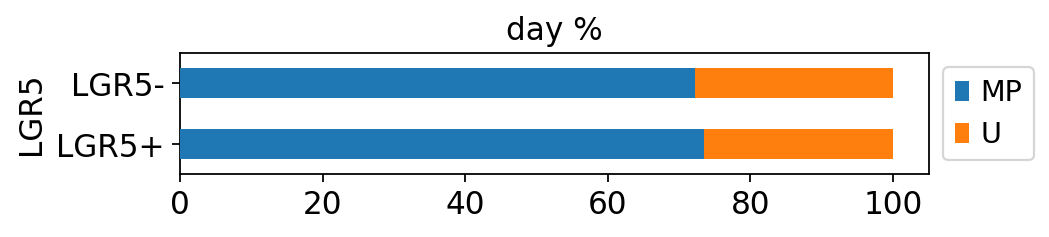

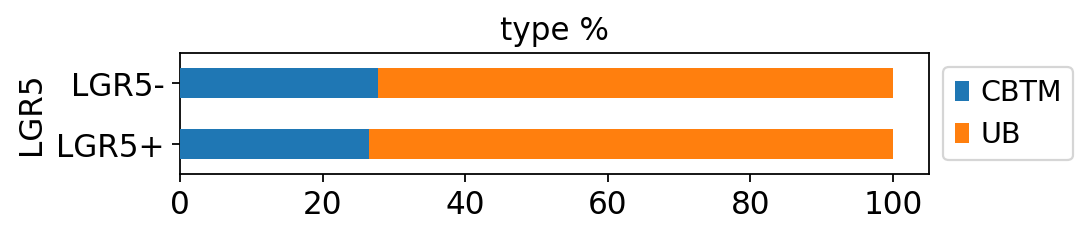

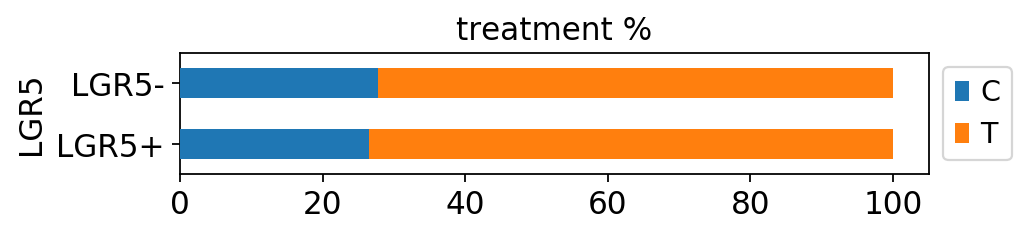

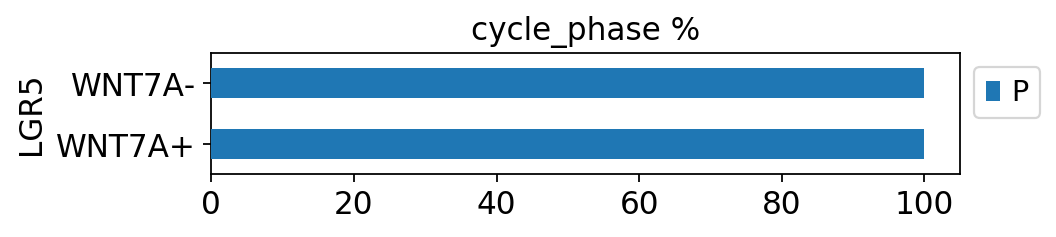

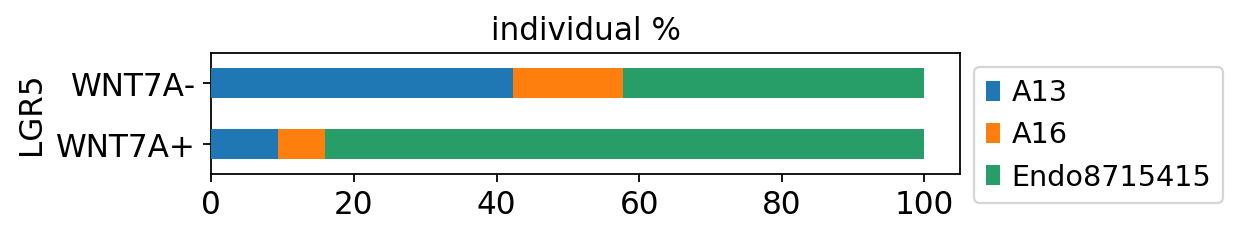

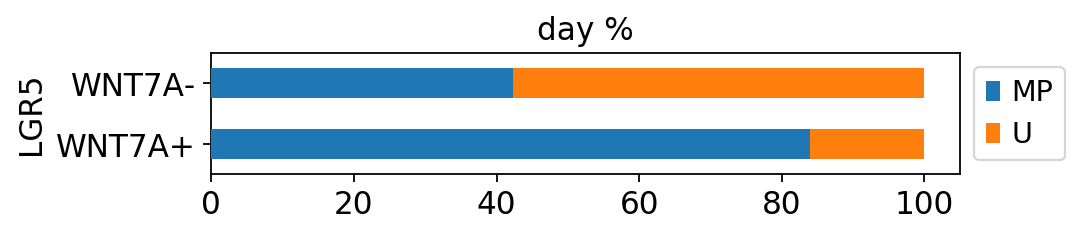

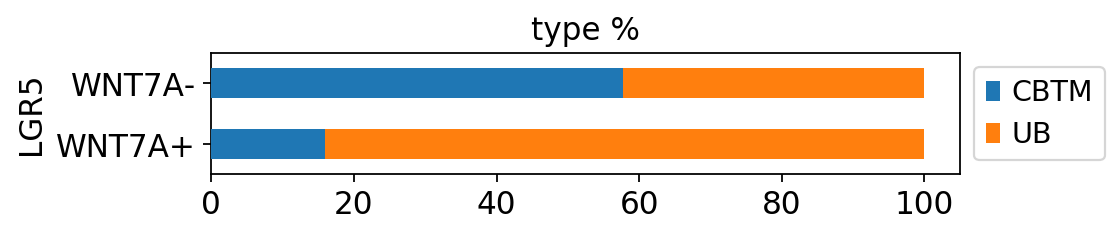

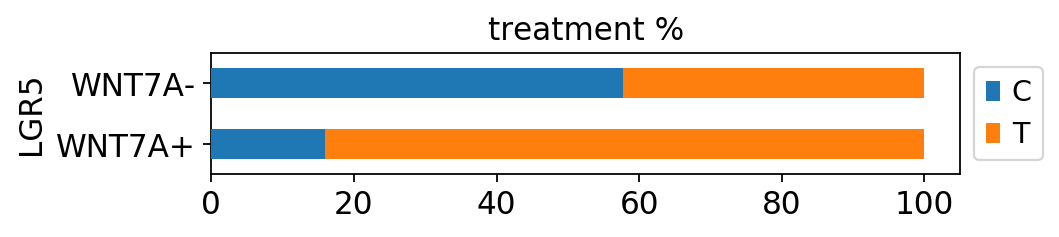

In [11]:
x = adata[[ i in ['LGR5'] for i in adata.obs['clusters'] ]]

# LGR5
x.obs['LGR5'] = 'LGR5-'
x.obs.at[  np.array([i>0 for i in x[:,'LGR5'].X ]) , 'LGR5'] = 'LGR5+'
Barplot('cycle_phase', x, 'LGR5', 1)
Barplot('individual', x, 'LGR5', 1)
Barplot('day', x, 'LGR5', 1)
Barplot('type', x, 'LGR5', 1)
Barplot('treatment', x, 'LGR5', 1)

# WNT7A
x.obs['LGR5'] = 'WNT7A-'
x.obs.at[  np.array([i>0 for i in x[:,'WNT7A'].X ]) , 'LGR5'] = 'WNT7A+'
Barplot('cycle_phase', x, 'LGR5', 1)
Barplot('individual', x, 'LGR5', 1)
Barplot('day', x, 'LGR5', 1)
Barplot('type', x, 'LGR5', 1)
Barplot('treatment', x, 'LGR5', 1)

# UMAP

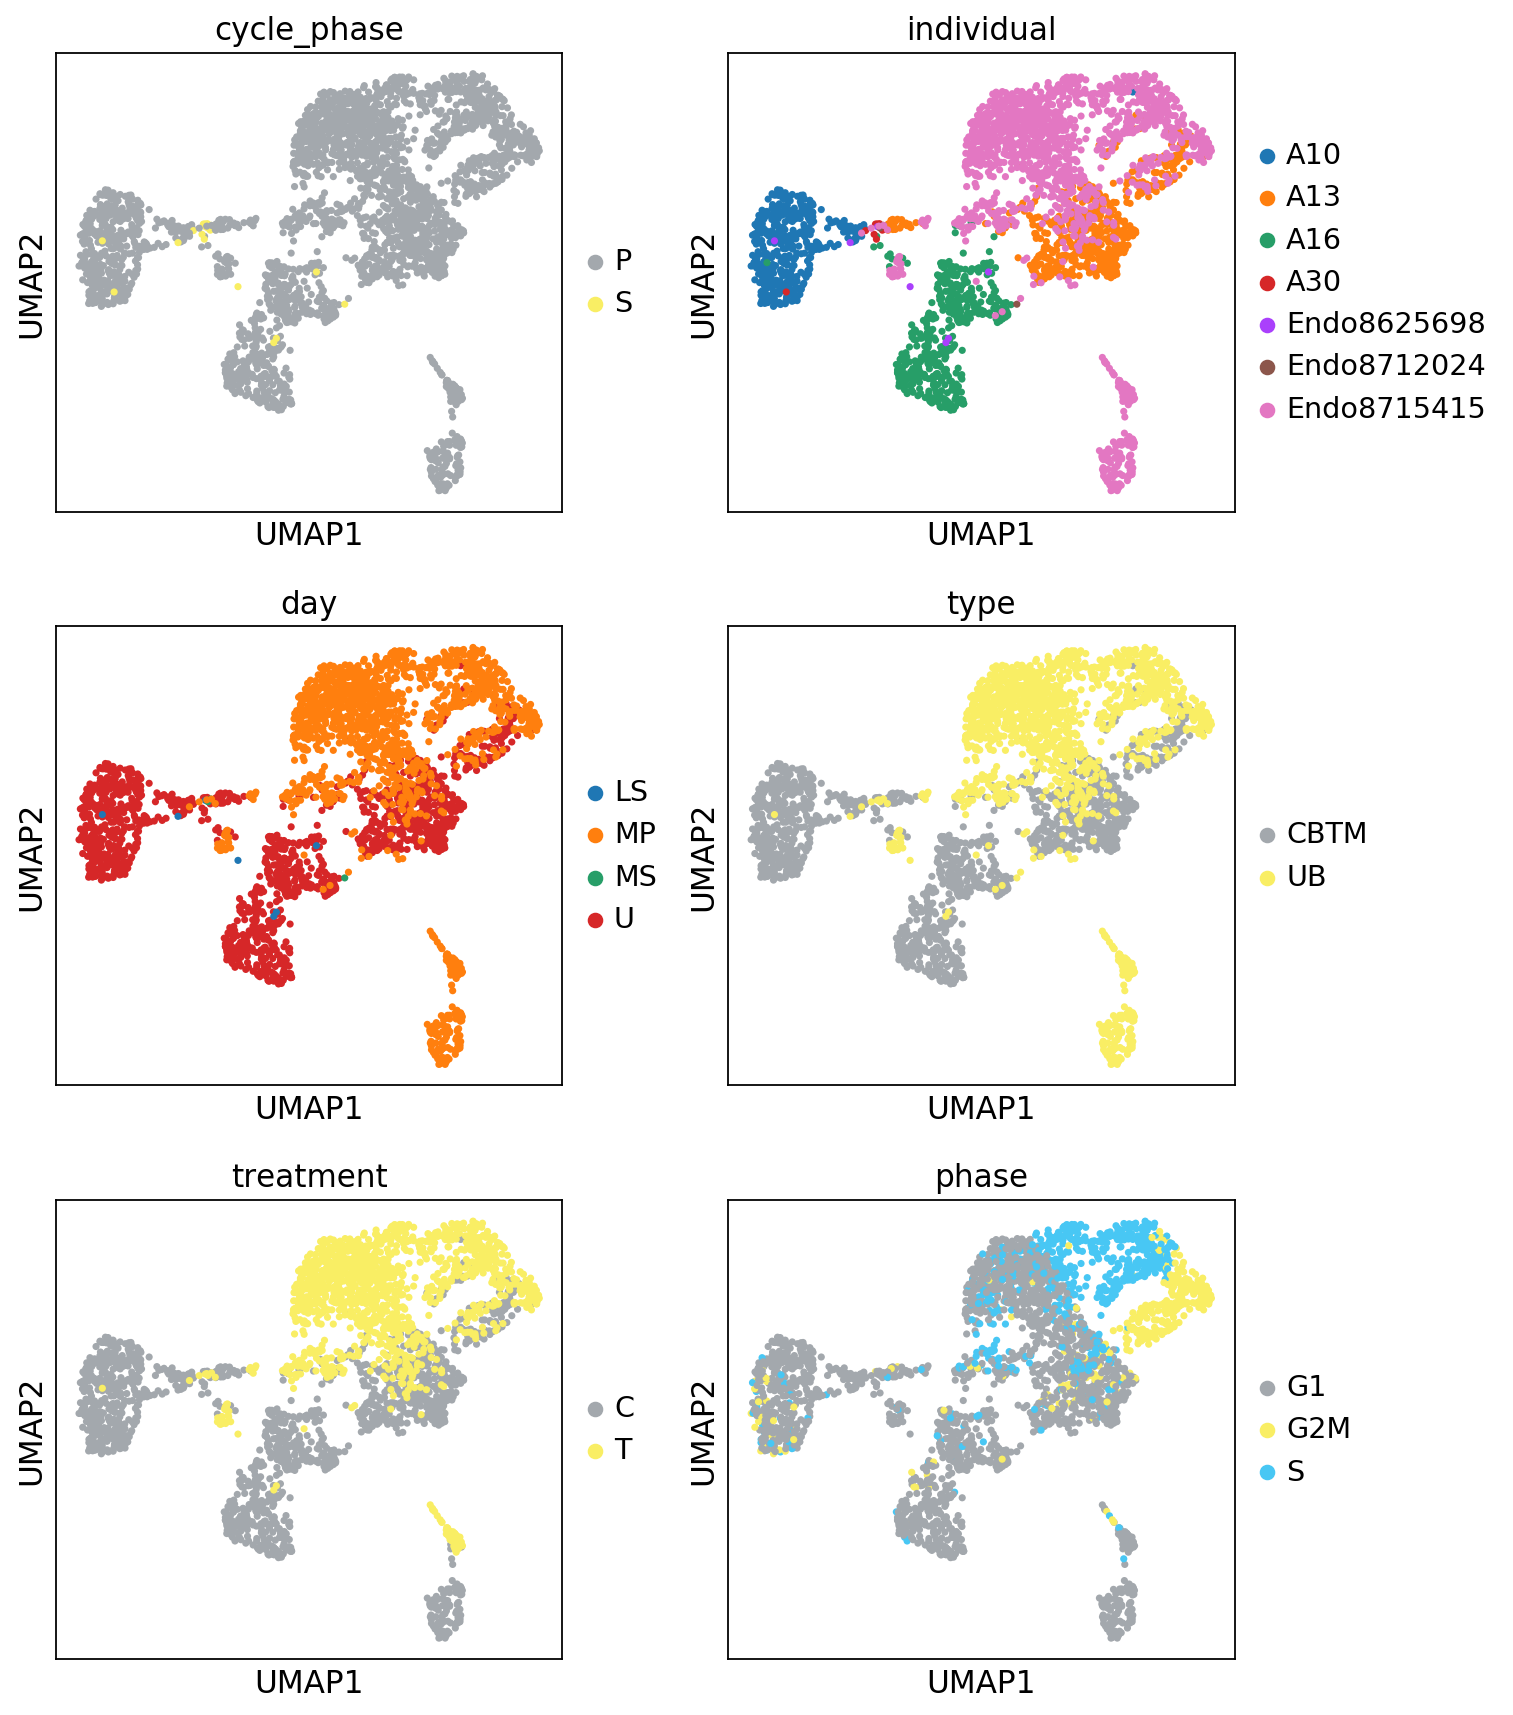

In [12]:
sc.pl.umap(adata, color=['cycle_phase', 'individual', 'day', 'type', 'treatment', 'phase'], 
           save='_metadata_primaryepithelial_highres.pdf', ncols = 2)

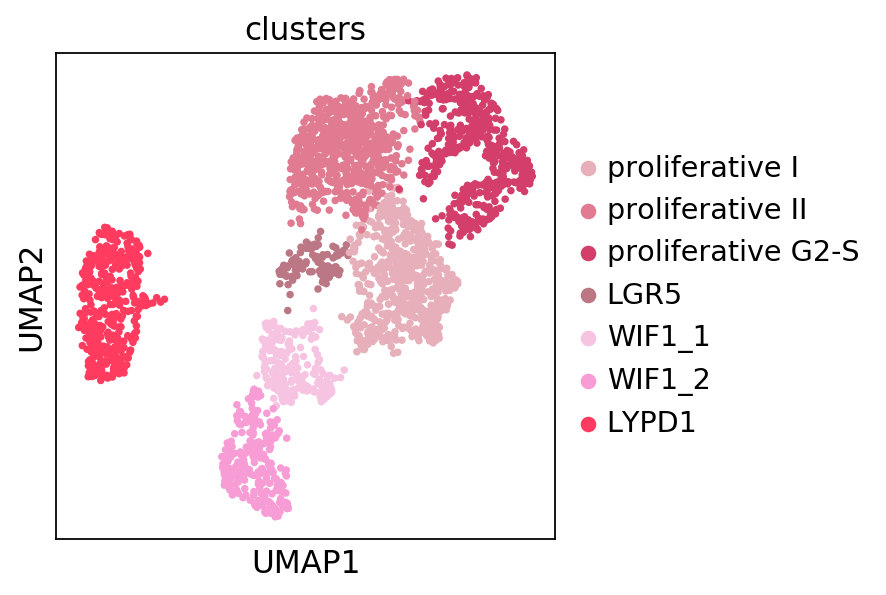

In [13]:
adata = adata[[ i not in ['doublet', 'LHX1', 'KRT5'] for i in  adata.obs['clusters']]]
sc.pl.umap(adata, color=['clusters'], save='_figure2D_primaryepithelial_highres_nocontaminants.pdf')

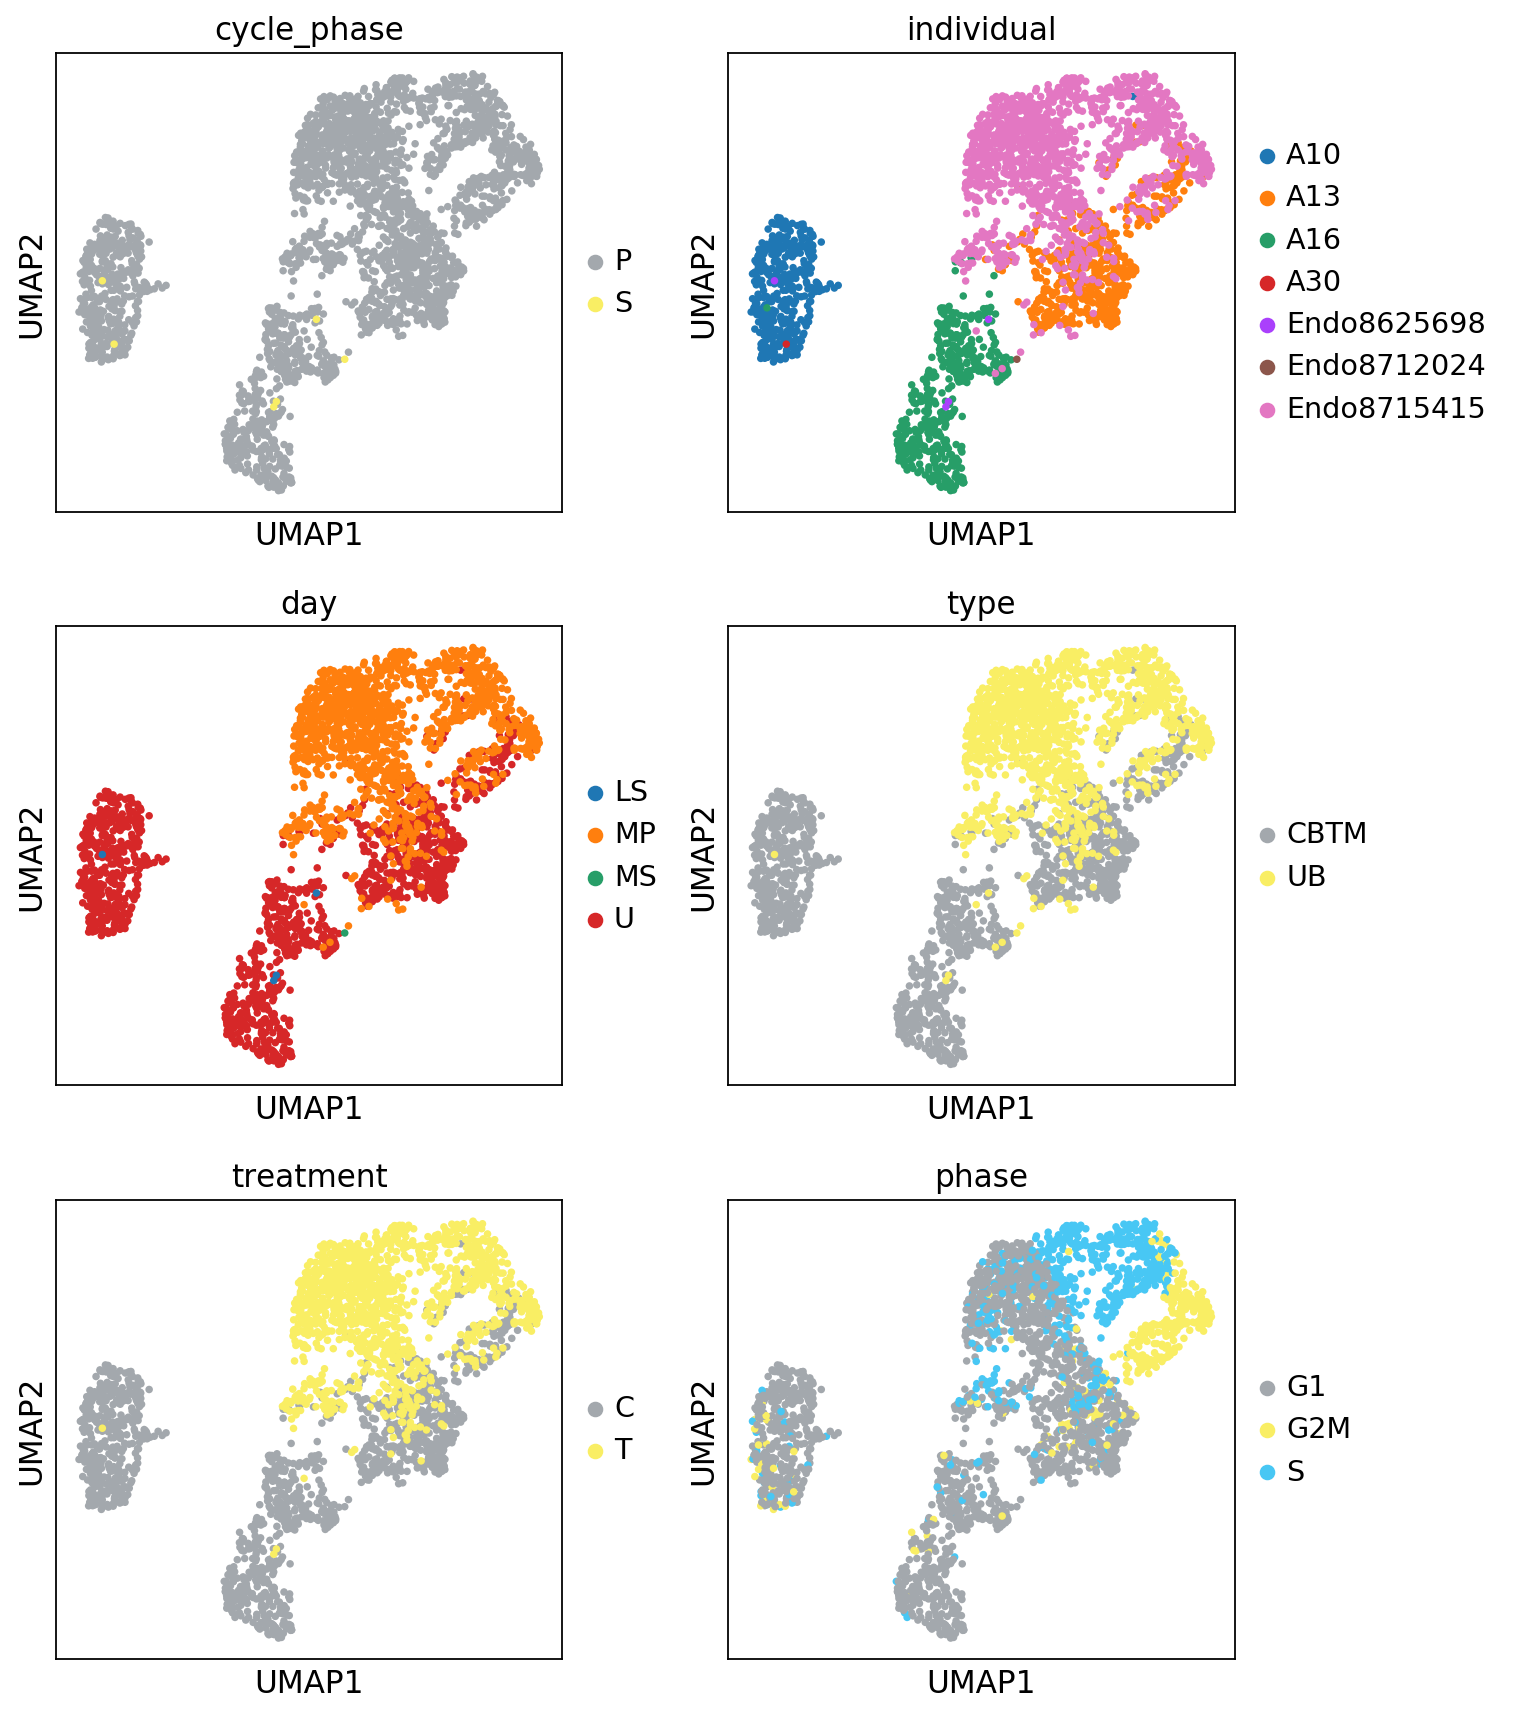

In [14]:
sc.pl.umap(adata, color=['cycle_phase', 'individual', 'day', 'type', 'treatment', 'phase'], 
           save='_metadata_primaryepithelial_highres_nocontaminants.pdf', ncols = 2)

In [17]:
print(adata.obs.clusters.values.describe())
adata

                    counts     freqs
categories                          
proliferative I        564  0.216424
proliferative II       654  0.250959
proliferative G2-S     454  0.174213
LGR5                   101  0.038757
WIF1_1                 199  0.076362
WIF1_2                 240  0.092095
LYPD1                  394  0.151190


AnnData object with n_obs × n_vars = 2606 × 4304 
    obs: 'batch', 'bh_pval', 'bonf_pval', 'clinical', 'day', 'individual', 'is_doublet', 'is_doublet_propagate', 'leiden', 'location', 'n_counts', 'n_genes', 'percent_mito', 'phase', 'sample', 'scrublet_cluster_score', 'scrublet_score', 'treatment', 'type', 'zscore', 'leiden_K', 'cycle_phase', 'S_score', 'G2M_score', 'leiden_v0', 'clusters'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cycle_phase_colors', 'day_colors', 'individual_colors', 'leiden', 'leiden_K_colors', 'leiden_colors', 'leiden_v0_colors', 'neighbors', 'pca', 'phase_colors', 'treatment_colors', 'type_colors', 'clusters_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

## Generate matrix and save cellXgene

In [94]:
adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs, asview=False)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)
sc.pp.log1p(adata_count)
sc.pp.scale(adata_count, max_value=10)
adata_count.obsm['X_umap'] = adata.obsm['X_umap']
adata_count.uns['clusters_colors'] = adata.uns['clusters_colors']
adata_count.write('cellXgene/endometrium_epithelial_progenitors.h5ad')

## Dotplot with markers

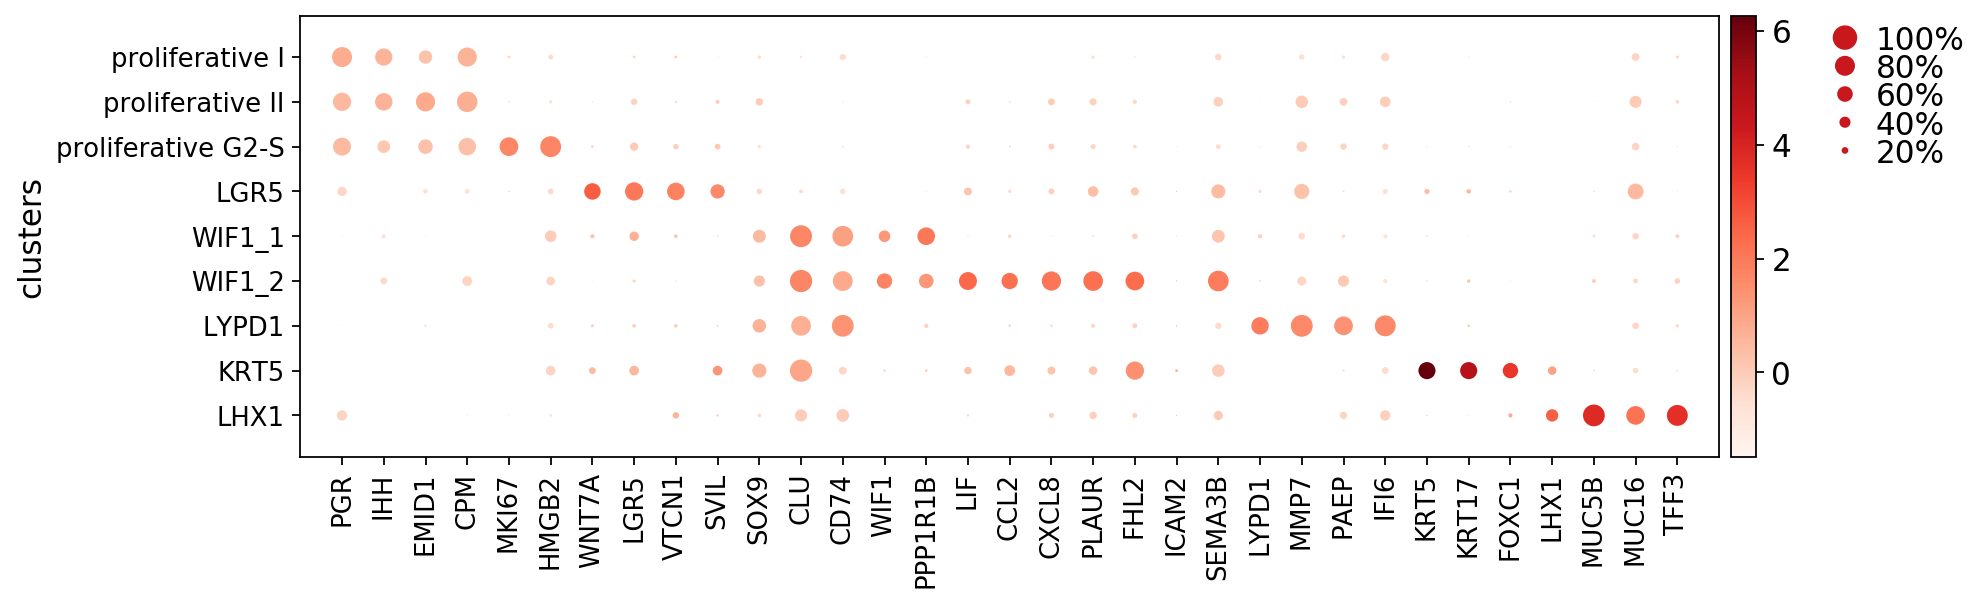

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[11.549999999999999, 0, 0.2, 0.5, 0.25])

In [95]:
markers = ['PGR', 'IHH', 'IGFBP4', 'GCLC', 'EMID1', 'CPM', 'SERPINA5',
           'WNT7A', 'VTCN1', 'SVIL', 'LGR5', 
           
           'KRT5', 'S100A2', 'KRT17', 'LAMB3', 'FOXC1', 'COL17A1', 
           
           'PDPN', 'SOX9', 'CCL2',  'CLU', 
           'WIF1', 'CD74', 'PPP1R1B', 'LIF', 'CXCL8', 'PLAU', 'PLAUR', 'SEMA3B', 'CXCL2', 'FHL2', 'ICAM1',
           
           'LYPD1', 'MMP7', 'PAEP', 'IFI6', 'IFITM3', 'IGFBP7', 'B2M', 
           'LHX1', 'MUC5B', 'BPIFB1',  'MUC16', 'TFF3', 'THSD4', 'NOTCH2']
markers = ['PGR', 'IHH', 'EMID1', 'CPM', 'MKI67', 'HMGB2', 
           'WNT7A', 'LGR5', 'VTCN1', 'SVIL', 
           'SOX9', 
           'CLU', 'CD74', 'WIF1', 'PPP1R1B', 
           'LIF', 'CCL2', 'CXCL8', 'PLAUR', 'FHL2', 'ICAM2', 'SEMA3B', 
           'LYPD1', 'MMP7', 'PAEP', 'IFI6', 
           'KRT5', 'KRT17', 'FOXC1',
           'LHX1', 'MUC5B', 'MUC16', 'TFF3']
sc.pl.dotplot(adata_count, markers, groupby='clusters', dendrogram=False, save='_primaryepithelial_highresolution.pdf')

In [96]:
# with open('data/markers/Markers_epithelium_genesonly.csv','r') as fid:
#     markers = [line.rstrip() for line in fid.readlines()]

# #make sure they're in the dataset, and sort them alphabetically for ease of finding things
# markers = [item for item in markers if item in adata_count.var_names]

# sc.pl.dotplot(adata_count, markers, groupby='clusters', dendrogram=False, save='_SFigure4c_primary_epithelial_nonciliated_SimonMarkers.pdf')

## Plot Markers

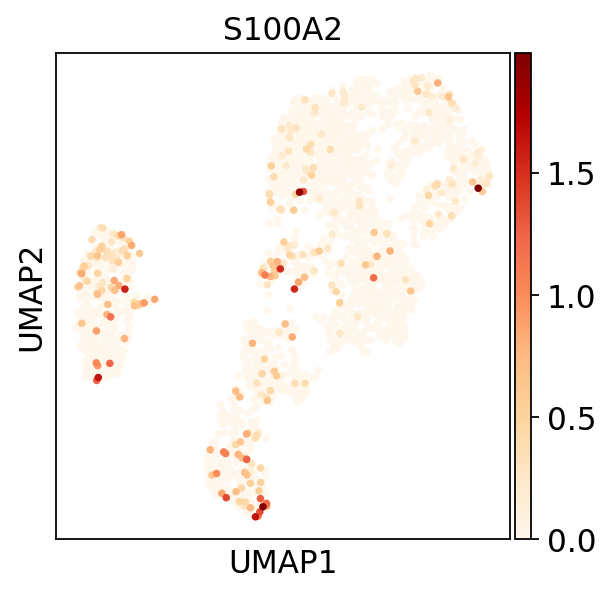

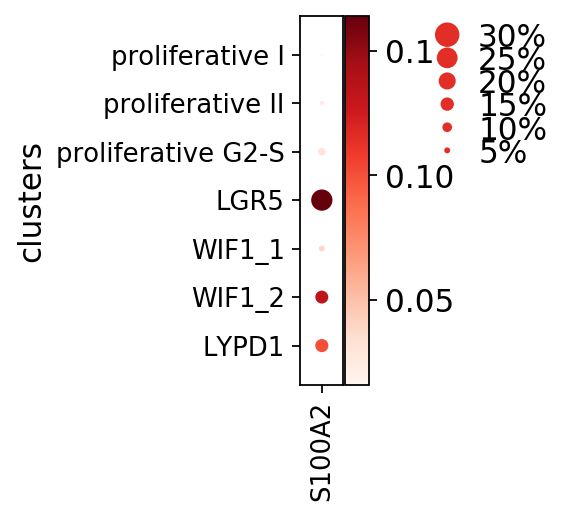

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[0.35, 0, 0.2, 0.5, 0.25])

In [97]:
adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs, asview=False)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)
sc.pp.log1p(adata_count)
# sc.pp.scale(adata_count, max_value=10)
adata_count.obsm['X_umap'] = adata.obsm['X_umap']
adata_count.uns['clusters_colors'] = adata.uns['clusters_colors']

sc.pl.umap(adata_count[[i not in ['KRT5',  'LHX1'] for i in adata_count.obs['clusters'] ]], color='S100A2', color_map='OrRd') # FEMALE
sc.pl.dotplot(adata_count[[i not in ['KRT5',  'LHX1'] for i in adata_count.obs['clusters']]], 'S100A2', groupby='clusters', dendrogram=False)

In [98]:
# markers = ['PGR', 'IHH', 'IGFBP4', 'GCLC', 'EMID1', 'CPM',
#                              'MKI67','HMGB2', "NOTCH3",
#                                   'LGR5','WNT7A', 'VTCN1', 'SLC26A7', 'CLDN22', 'PDPN', 'KRT5',
#                                  'LGR6', 'PNMT', 'TRH', 'PPP1R1B', 'ALDH1A1', 'WIF1',
#                                  'SEMA3B','FHL2', 'LIF', 'CCL2', 'ICAM1', 'CXCL2',
#                                  'MMP7', 'IFI6', 'RBP1', 'LYPD1', 'PAEP',
#                              'PTGS1', 'MT1G','ENPP3', 'SLC26A2',
#                                'C10orf10','NOTCH2', 'SCGB2A1', 'PDK4', 'ANG', 'C4BPA',
#                             'CXCL14','PAEP', 'RIMKLB', 'NUPR1','TFF3', 'MUC5B', 
#                             'LTF', 'BPIFB1', 'LHX1', 'PIFO', 'FOXJ1', 'TPPP3']
# sc.pl.umap(adata, color=markers, save='_markers_primary_epithelial_nonciliated_fromDotplot.pdf',color_map='OrRd', use_raw=True) # FEMALE

In [99]:
# sc.pl.umap(adata, color=sorted(["LGR4", "LGR5", "LGR6", "NGFR", "TP63", "KRT5", "PDPN", "SOX9", "WNT7A", "SNAI2", "ZEB1"]), save='_primary_epithelial_nonciliated_markers_RoserStemPopulations.pdf',color_map='OrRd', use_raw=True)
# sc.pl.umap(adata, color=["FGFR2", "CTNNB1", "FBXW7" , "MYC", "CCNE1", "ARID1A", "ERBB2", "PIK3CA", "ERBB2", "PTEN", "SPOP", "FOXA2", "ARHGAP35", "TP53", "ZFHX3"], save='SFigure5b_markers_figure6_primary_epithelial_nonciliated_RoserTranslational.pdf',color_map='OrRd', use_raw=True)

In [100]:
# sc.pl.umap(adata, color=["PGR", "TRH", # Proliferative 
#                          "MMP10",# Menstruation 
#                          "GLI3", "IHH", "SHH",  # sonic hedgehog (Shh) pathway
#                          "PAEP", # Glandular secretory
#                          "IGFBP2", "LHX1", "GPRC5A"], save='-markers_keystages.pdf',color_map='OrRd', use_raw=True) # FEMALE

In [101]:
# sc.pl.umap(adata, color=["WNT7A", 
#                          "MKI67", # progenitor 
#                          "LYPD1", # Unknown 1
#                          "WIF1",  "CCL2", # Unknown 2
#                          "CXCL14", #  Only Glandular
#                          "SLC26A2", #  Mid Secretory Glandular
#                          "DPP4", #  Late Secretory Glandular
#                          "TFF3",
#                          "MUC5B" # new lubricant
#                         ], save='-markers_LuzPanel.pdf',color_map='OrRd', use_raw=False) # FEMALE

In [102]:
# sc.pl.umap(adata, color=["KRT5",  "LGR6", "WNT7A", "MKI67", 
#                          "PGR", "TRH", "NUPR1", "RIMKLB", "EMID1", "IHH", "IFI27", "ESR1", "LGR5",# progenitor 
#                          "WIF1", "KRT13", "MMP7", "CCL2", "PLAU", # Luminal 
#                          "PAEP",  "DPP4", # Early Glandular
#                          "SCGB1D2",# Late Glandular
#                          "MUC5B"], save='-markers_pseudotime.pdf',color_map='OrRd', use_raw=True) # FEMALE

In [103]:
# sc.pl.umap(adata, color=["MMP7", "PAEP", "KRT13", "KRT18", # Roser panel
#                          "WNT7A", "NOTCH2",# Roser panel
#                          "PLAU", "CXCL8", "LIF",# Roser panel
#                          "LGR6", "WIF1", "DKK3", # progenitor 
#                          "LYPD1", "PGR", "IHH", "LCN2",
# #                          "PIFO", "FOXJ1",  #ciliated
#                          "SEMA3B", "SEMA3C", "SVIL", "FHL2", "CCL2", #luminal secretory
#                          "DCDC2", "HES6",  # from organoids analysis - early secretory
#                          "PLAU", # from Simon -  menstrual/ early proliferative
#                          "CXCL8", "SCGB2A1", # from Simon - mid secretory
#                          "PAEP", # from organoids analysis - late secretory
#                          "HMGB2", # proliferating
#                          "MUC5B", 'TFF3', # secretory mucosa
#                          "LIF", "MUC1", "VTCN1", "LGR5", "HPGD", "IL6", # unknown
#                          "CALCA", "PLAT", 
#                          "LCN2", "SLC22A17"
#                         ], save='-markers.pdf',color_map='OrRd', use_raw=True) # FEMALE

In [104]:
# sc.pl.umap(adata, color=["PLAU", "MMP7", "THBS1", "CADM1",
#                          "NPAS3", "ATP1A1", "ANK3", "ALPL", 
#                          "TRAK1", "SCGB1D2", "MT1F", "MT1X",
#                          "MT1E", "MT1G", "CXCL14", "MAOA",
#                          "DPP4", "NUPR1", "GPX3", "PAEP"], save='-markers_SimonTimeline.pdf',color_map='OrRd', use_raw=True) # FEMALE

In [105]:
# sc.pl.umap(adata, color=["PGR", "TRH", # Proliferative 
#                          "MMP10",# Menstruation 
#                          "GLI3", "IHH", "SHH",  # sonic hedgehog (Shh) pathway
#                          "PAEP" # Glandular secretory
#                          ], save='-markers_keystages.pdf',color_map='OrRd', use_raw=True) # FEMALE

In [106]:
# sc.pl.umap(adata, color=["SLC26A2", "DPP4", "PLAU", "SEMA3B",
#                          "LHX1", "LGR6", "KRT13", "WNT7A",
#                           "WIF1", "KRT5","LYPD1", "PAEP", "CCL2", "PTGS1"], save='-markers_RoserPanel.pdf',color_map='OrRd', use_raw=True) # FEMALE

In [107]:
# sc.pl.umap(adata, color=["HMGB2", "MKI67", "DKK1", "LIF",
#                          "CXCL8", "PLAU", "WNT7A", "NOTCH3",
#                           "NOTCH2", "MMP7","KRT13", "PAEP",
#                         "NGFR", "TP63", "KRT5", "PDPN"], save='-markers_RoserPanel.pdf',color_map='OrRd', use_raw=True) # FEMALE

In [108]:
# with open('data/markers/Markers_epithelium_genesonly.csv','r') as fid:
#     markers = np.unique([line.rstrip() for line in fid.readlines()])

# #make sure they're in the dataset, and sort them alphabetically for ease of finding things
# markers = sorted([item for item in markers if item in adata.var_names])

# sc.pl.umap(adata, color=markers, use_raw=False, save='_markers_primary_epithelial_nonciliated_fromSimon.pdf', color_map='OrRd')

# Find marker genes


### scanpy

In [109]:
adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs, asview=False)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)
sc.pp.log1p(adata_count)
sc.pp.scale(adata_count, max_value=10)

In [110]:
# marker calling
sc.tl.rank_genes_groups(adata_count, groupby='clusters', n_genes=50000, use_raw=True) #, method='logreg'

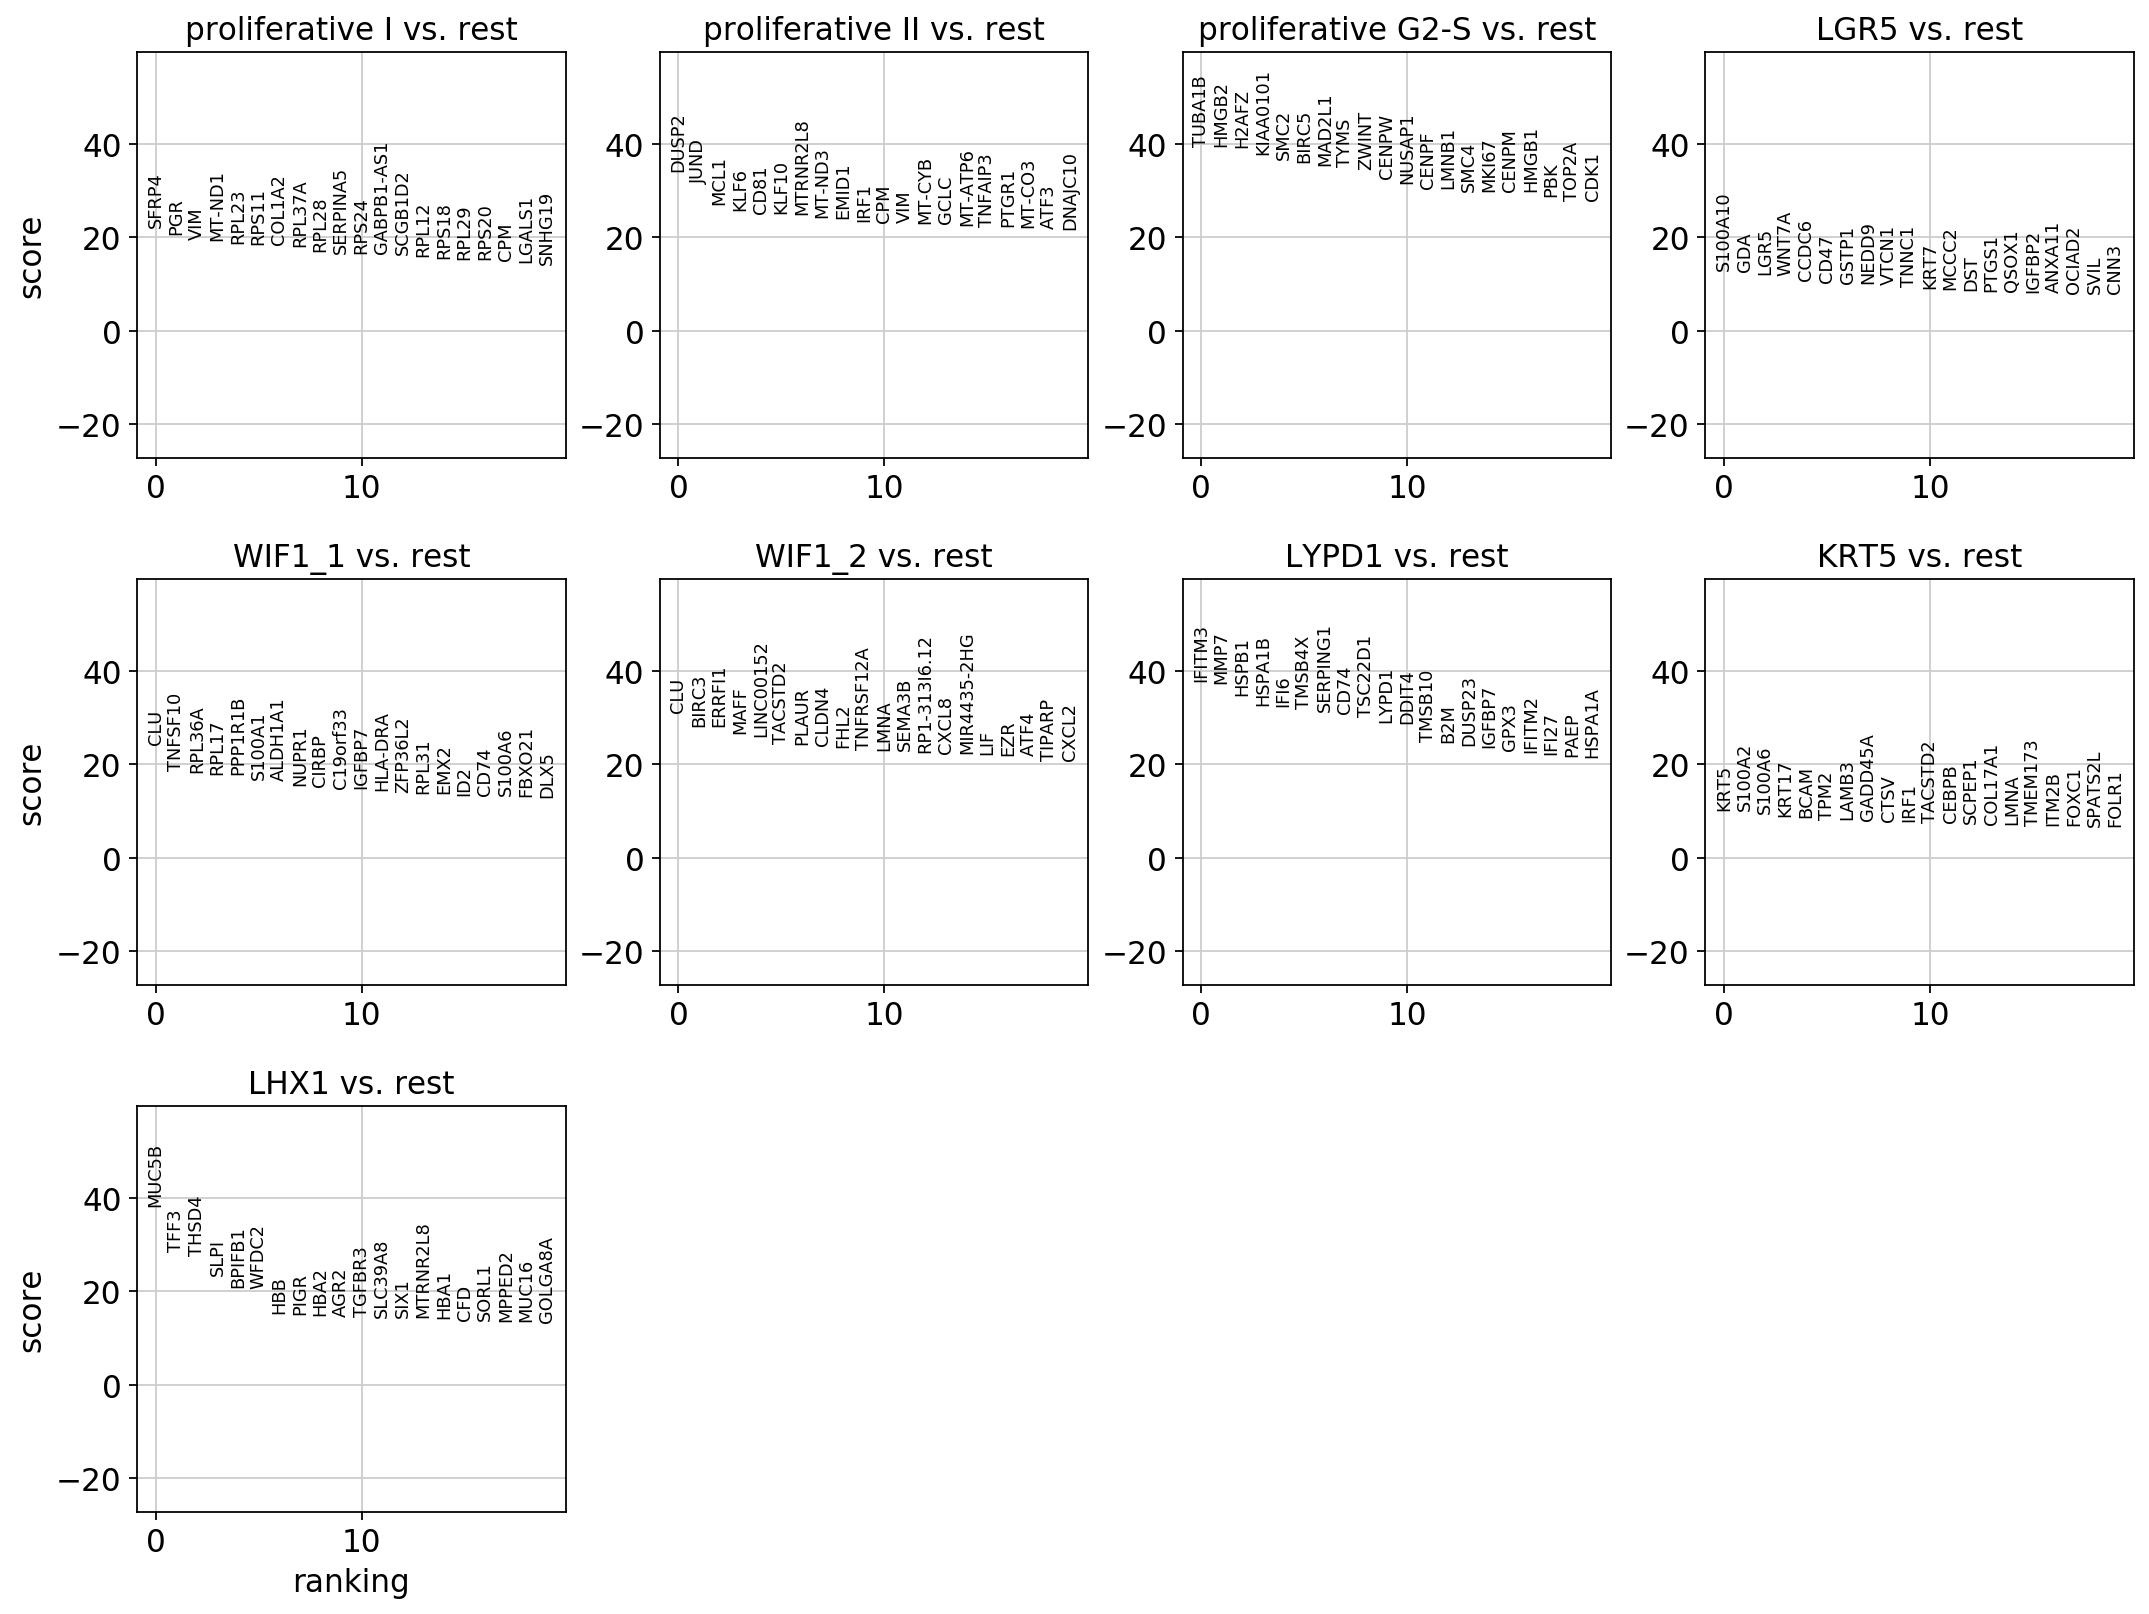

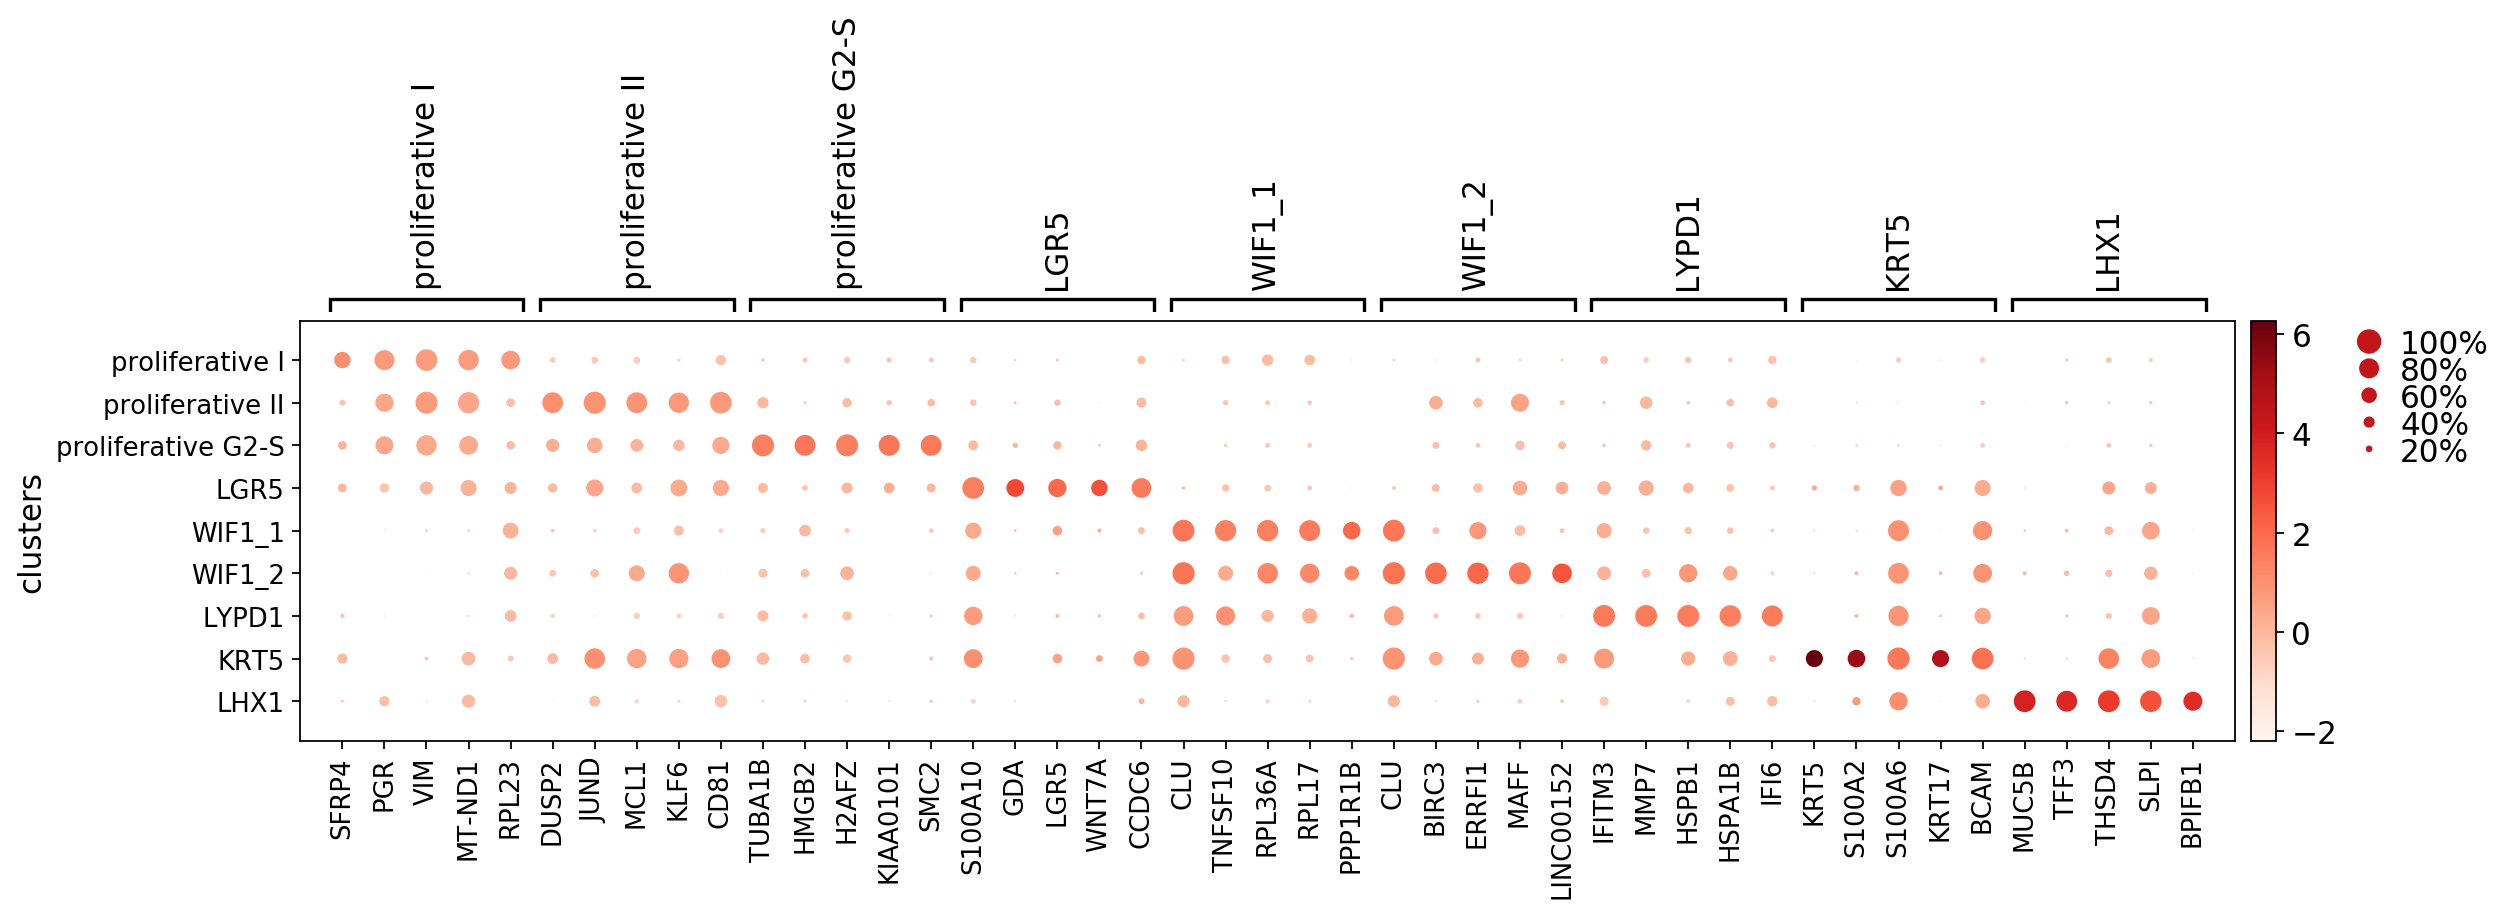

In [111]:
#marker visualisation
sc.pl.rank_genes_groups(adata_count, n_genes=20, save='.pdf')
sc.pl.rank_genes_groups_dotplot(adata_count, n_genes=5, dendrogram=False, save='_DEscanpy.pdf')

In [112]:
result = adata_count.uns['rank_genes_groups']

os.system('mkdir -p '+str(sc.settings.figdir)+'/cluster_markers/')
os.system('rm '+str(sc.settings.figdir)+'/cluster_markers/*.csv')

for group in result['names'].dtype.names:
    print(group)
    adata_clus = adata_count[adata_count.obs['clusters'] == group]
    adata_rest = adata_count[[not i for i in adata_count.obs['clusters']==group]]
    mask = (result['pvals_adj'][group]<=1) & (result['scores'][group]>0)
    markdict = {'gene_'+key: result[key][group][mask] for key in ['names', 'pvals', 'pvals_adj', 'logfoldchanges']}
    adata_clus = adata_clus[:,markdict['gene_names']]
    adata_rest = adata_rest[:,markdict['gene_names']]
    markdict['mean_cluster'] = np.asarray(np.mean(adata_clus.X,axis=0)).reshape(-1)
    markdict['mean_rest'] = np.asarray(np.mean(adata_rest.X,axis=0)).reshape(-1)
    markdict['log2_FC'] = np.asarray(np.log2(markdict['mean_cluster']/markdict['mean_rest'])).reshape(-1)
    #are you expressed?
    adata_clus.X = adata_clus.X > 0
    adata_rest.X = adata_rest.X > 0
    markdict['percent_cluster'] = np.asarray(100*np.sum(adata_clus.X,axis=0)/adata_clus.shape[0]).reshape(-1)
    markdict['percent_rest'] = np.asarray(100*np.sum(adata_rest.X,axis=0)/adata_rest.shape[0]).reshape(-1)
    df = pd.DataFrame(markdict)
    df.rename(columns={'gene_names':'Gene',
                       'gene_logfoldchanges':'logFC',
                       'log2_FC':'log2_FC',
                       'gene_pvals':'P.Value',
                       'gene_pvals_adj':'adj.P.Val',
                       'mean_cluster':'mean_cluster',
                       'mean_rest':'mean_rest'},
              inplace=True)
    df.to_csv(str(sc.settings.figdir)+'/cluster_markers/'+group+'_scanpy_DEGs.csv')

proliferative I


Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


proliferative II


Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


proliferative G2-S


Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


LGR5


Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


WIF1_1


Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


WIF1_2


Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


LYPD1


Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


KRT5


Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


LHX1


Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


### Scanpy on TF-IDF values

In [113]:
adata_bin = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs, asview=False)

import episcanpy as epi
epi.pp.binarize(adata_bin, copy=False)
adata_bin.X.shape


(2794, 19794)

In [114]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformer

tfidf = transformer.fit_transform(adata_bin.X.T)
adata_bin.X = tfidf.T
adata_bin.X.shape

(2794, 19794)

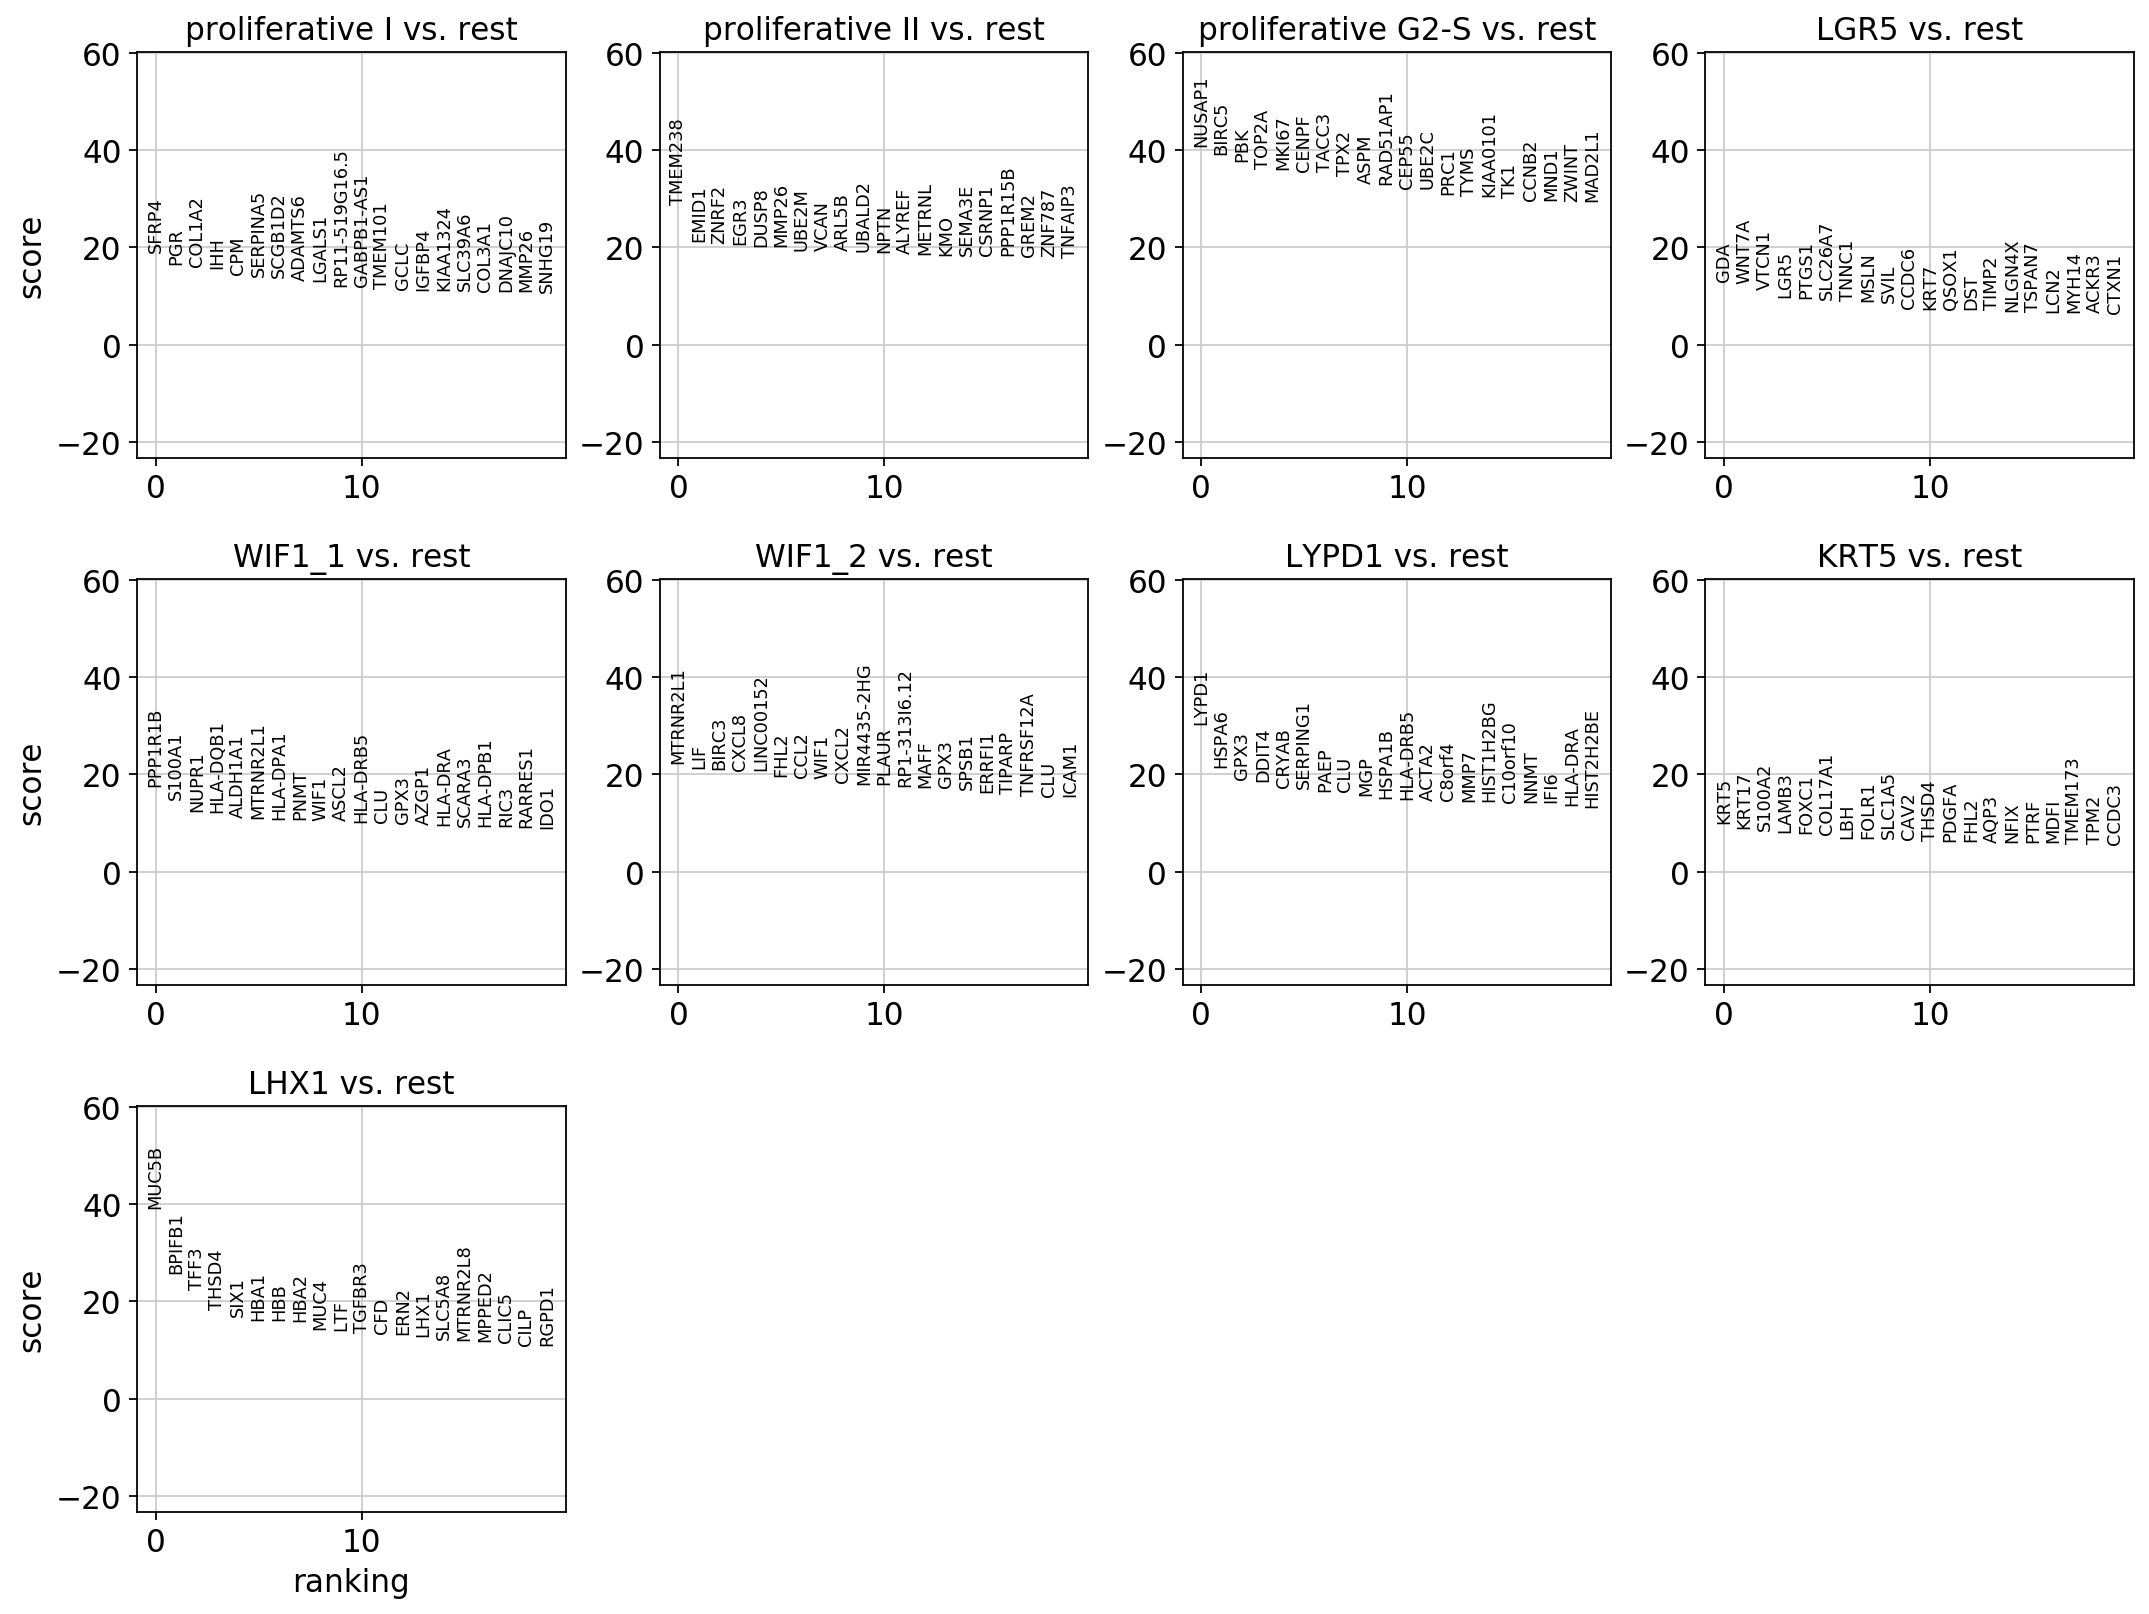

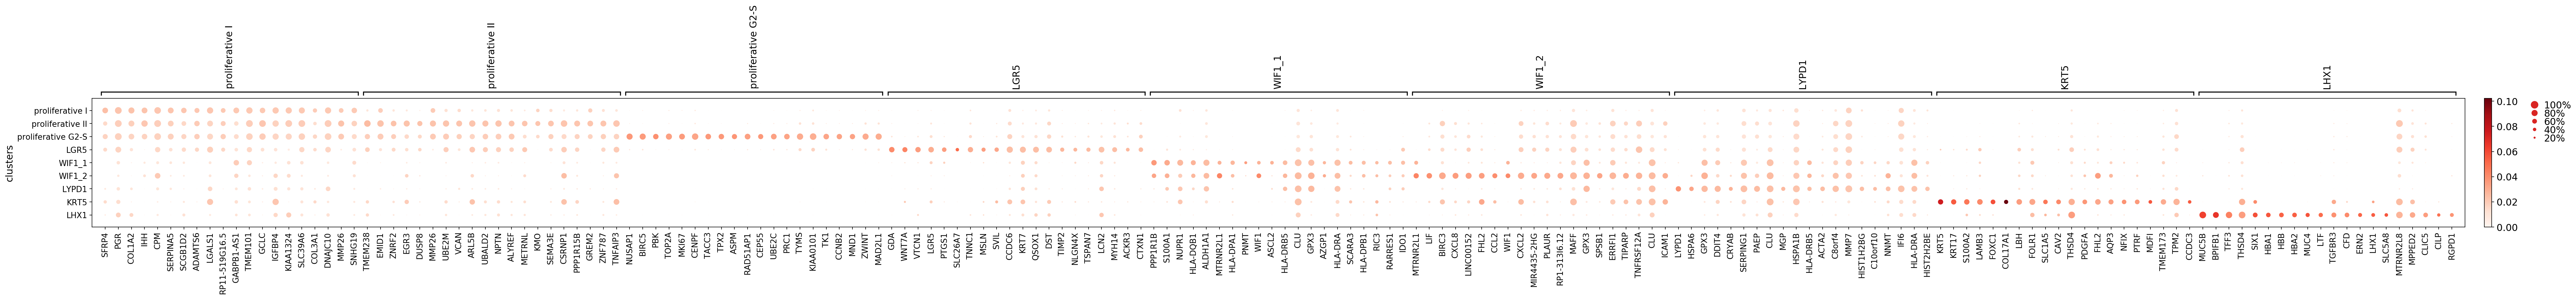

In [115]:
sc.tl.rank_genes_groups(adata_bin, groupby='clusters', n_genes=50000, use_raw=False) #, method='logreg'
sc.pl.rank_genes_groups(adata_bin, n_genes=20, save='_tfidf.pdf')
sc.pl.rank_genes_groups_dotplot(adata_bin, n_genes=20, dendrogram=False, save='_tfidf_DEscanpy.pdf')

In [116]:
adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs, asview=False)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)
sc.pp.log1p(adata_count)
sc.pp.scale(adata_count, max_value=10)
adata_count.uns['rank_genes_groups'] = adata_bin.uns['rank_genes_groups']

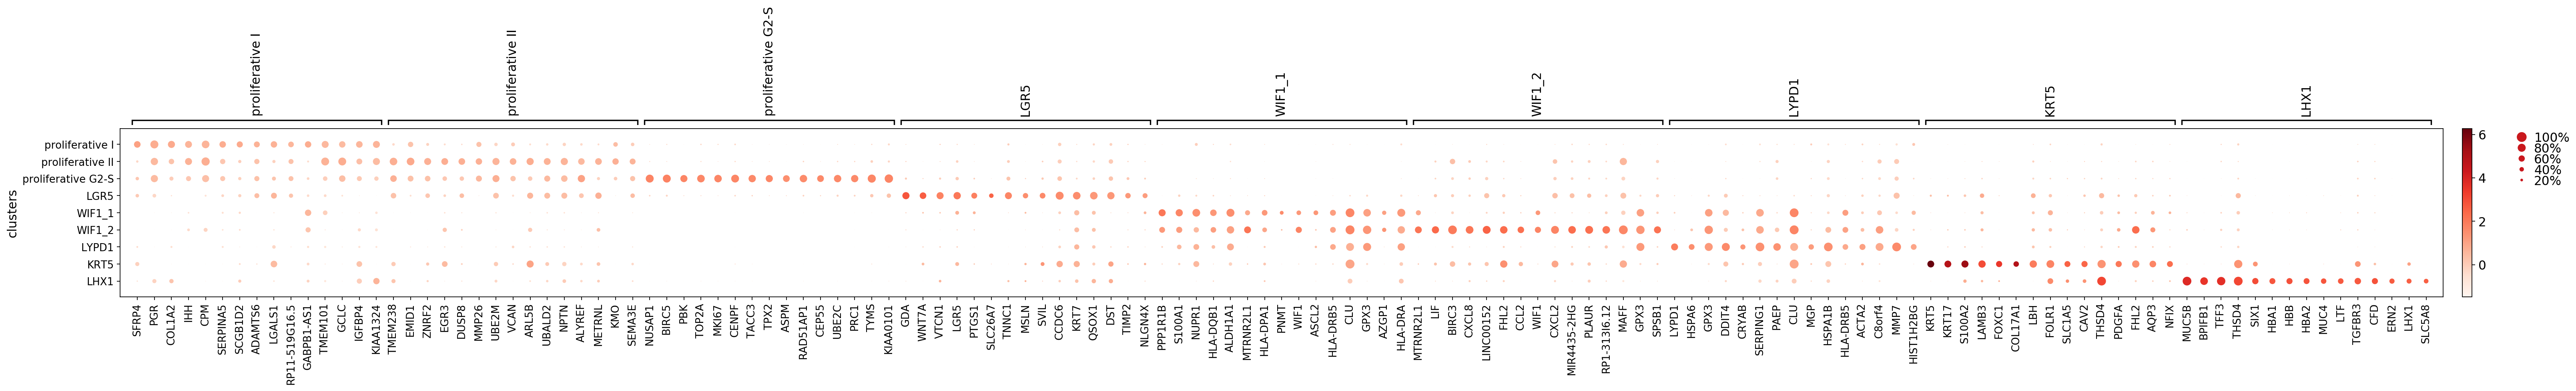

In [117]:
sc.pl.rank_genes_groups_dotplot(adata_count, n_genes=15, dendrogram=False, save='_tfidf_DEscanpy.pdf')

### DE with limma

Prepare object to run limma

In [118]:
adata_count = anndata.AnnData(X=np.expm1(adata.raw.X), var=adata.raw.var, obs=adata.obs)
sc.pp.filter_genes(adata_count, min_cells=5)
sc.pp.filter_cells(adata_count, min_genes=200)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)
sc.pp.log1p(adata_count)
print(adata_count.X.shape)

(2794, 19609)


In [119]:
t = adata_count.X.toarray().T
df = pd.DataFrame(data=t, columns= adata_count.obs.index, index=adata_count.var_names)

In [120]:
adata_count.obs['clusters'].values.describe()

counts     freqs
categories                          
proliferative I        564  0.201861
proliferative II       654  0.234073
proliferative G2-S     454  0.162491
LGR5                   101  0.036149
WIF1_1                 199  0.071224
WIF1_2                 240  0.085898
LYPD1                  394  0.141016
KRT5                    39  0.013958
LHX1                   149  0.053329

In [121]:
meta_df = pd.DataFrame(data={'Cell':list(adata_count.obs.index),
                             'cell_type':[ str(i) for i in adata_count.obs['clusters']],
                             'sample':[ str(i) for i in adata_count.obs['individual']],
                             'covariate':[ i for i in adata_count.obs['type']]})
meta_df.head()

Cell cell_type sample covariate
0  4861STDY7309368_AACTTTCCAGACGTAG     LYPD1    A10      CBTM
1  4861STDY7309368_AATCCAGTCAGAAATG     LYPD1    A10      CBTM
2  4861STDY7309368_AATCGGTTCATGTAGC     LYPD1    A10      CBTM
3  4861STDY7309368_ACACCAACAGGCTGAA     LYPD1    A10      CBTM
4  4861STDY7309368_ACACCGGAGTTGAGAT     LYPD1    A10      CBTM

In [122]:
outpath = str(sc.settings.figdir)+'/cluster_markers/'

In [123]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [124]:
%%R -i df -i meta_df -i outpath

library(limma)
library(edgeR)

# Format
ex_mat=as.matrix(df)
rownames(meta_df) = meta_df$Cell


# Shared cells
rownames(meta_df) = gsub('-', '.', rownames(meta_df))
colnames(ex_mat) = gsub('^X', '', colnames(ex_mat))

shared_cells = intersect(rownames(meta_df), colnames(ex_mat))
print(rownames(meta_df)[1:3])
print(colnames(ex_mat)[1:3])
message(length(shared_cells), ' shared cells')
ex_mat = ex_mat[, shared_cells]
meta_df = meta_df[shared_cells,]

# Filter low expressed genes
keep = aveLogCPM(ex_mat) > 0
ex_mat = ex_mat[ keep, ]

# Extract celltypes
cells = rownames(meta_df)
covariate = meta_df$covariate


# For each cluster, make cluster vs rest comparison
celltypes = unique(meta_df$cell_type)
for (celltype in celltypes){
    message(celltype)
    
    # Extract cells in cluster and rest
    cells_cluster = rownames(subset(meta_df, cell_type == celltype))
    cells_rest = rownames(subset(meta_df, cell_type != celltype))
    message('Cells in cluster ', length(cells_cluster), '\nCells in rest ', length(cells_rest))
    
    # build cluster_type vector
    cluster_type = rep(0, length(cells))
    names(cluster_type) = cells
    cluster_type[ cells_cluster ] = 'cluster'
    cluster_type[ cells_rest ] = 'rest'
    
    design.matrix <- model.matrix(~ 0 + cluster_type + covariate)
    
    # Now tell limma how do you want to compare (i.e. cluster vs rest rest)
    contrast.matrix <- makeContrasts(clVSrest = cluster_typecluster - cluster_typerest, levels = design.matrix)

    # Make model and run contrasts
    fit <- lmFit(ex_mat, design.matrix)
    fit <- contrasts.fit(fit, contrast.matrix)
    fit <- eBayes(fit)
    
    # Make a dataframe containing the important data
    results = topTable(fit, adjust="fdr", number = nrow(ex_mat), coef = 'clVSrest')
    
    # Add and filter needed data
    results$Gene = rownames(results)
    results = results[ , c('Gene', 'logFC', 'P.Value', 'adj.P.Val')]
    results$AveExpr_cluster = apply(ex_mat[ results$Gene, cells_cluster], 1, mean)
    results$AveExpr_rest = apply(ex_mat[ results$Gene, cells_rest], 1, mean)
    results$percentExpr_cluster = apply(ex_mat[ results$Gene, cells_cluster], 1, function(x) sum(c(x > 0)+0) ) / length(cells_cluster)
    results$percentExpr_rest = apply(ex_mat[ results$Gene, cells_rest], 1, function(x) sum(c(x > 0)+0) ) / length(cells_rest)
    
    results$AveExpr_cluster = round(results$AveExpr_cluster, 6)
    results$AveExpr_rest = round(results$AveExpr_rest, 6)
    results$percentExpr_cluster = round(results$percentExpr_cluster, 6)
    results$percentExpr_rest = round(results$percentExpr_rest, 6)
    # and store it as csv file
    write.csv(results, file = paste0(outpath, celltype, '_DEGs.csv'), row.names = F, col.names = T, quote = F)
    
}

R[write to console]: Error in library(limma) : there is no package called ‘limma’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library




Error in library(limma) : there is no package called ‘limma’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library


### rbcde

In [125]:
rbcde.RBC(adata_count, use_raw=False, clus_key='clusters')
degs, plot_dict = rbcde.filter_markers(adata_count, use_raw=False, thresh=0.5)

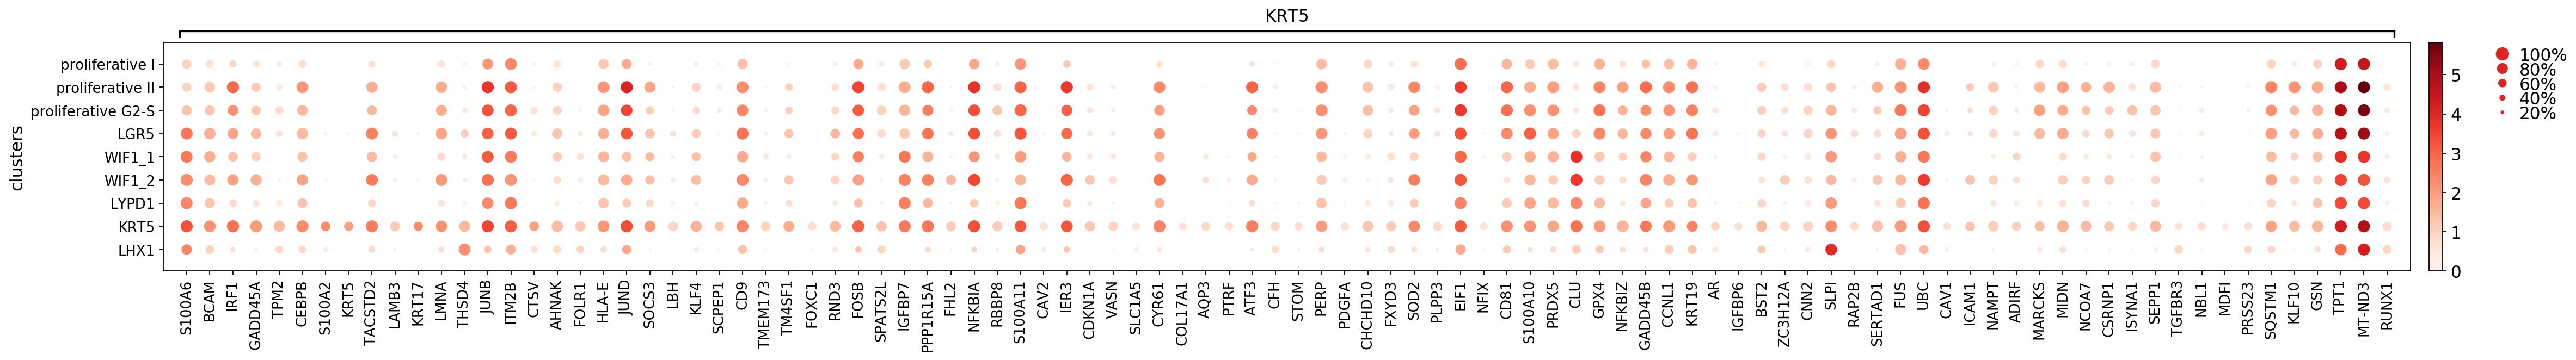

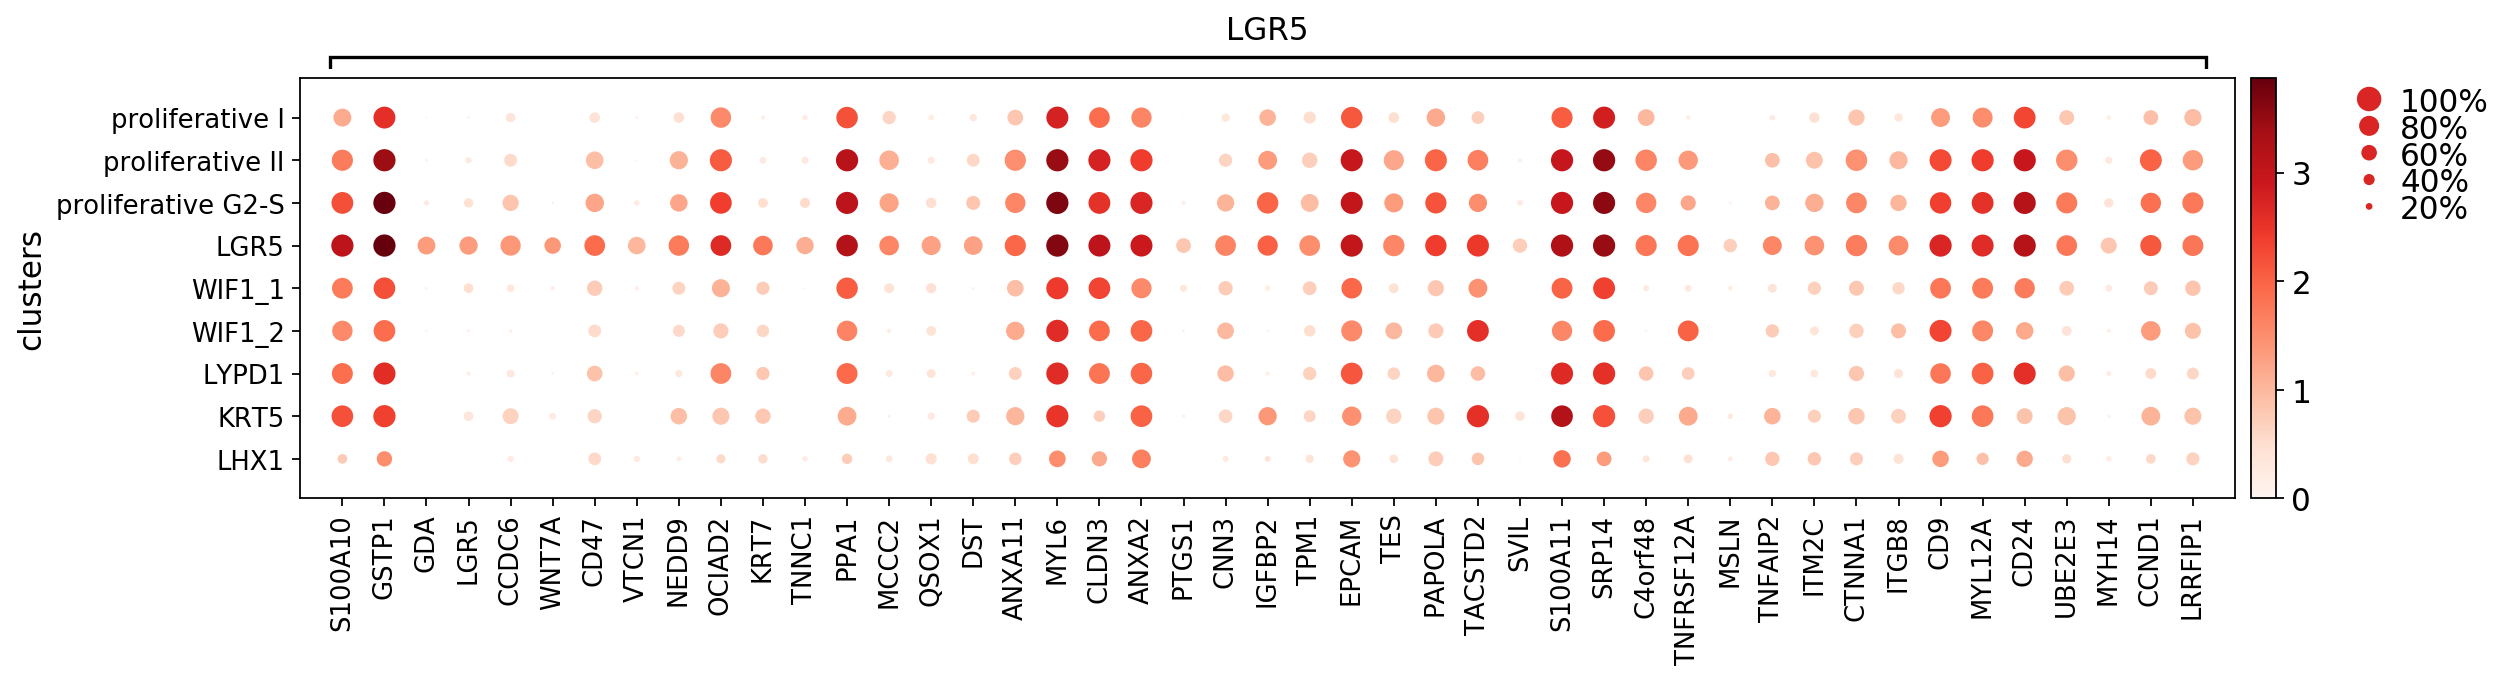

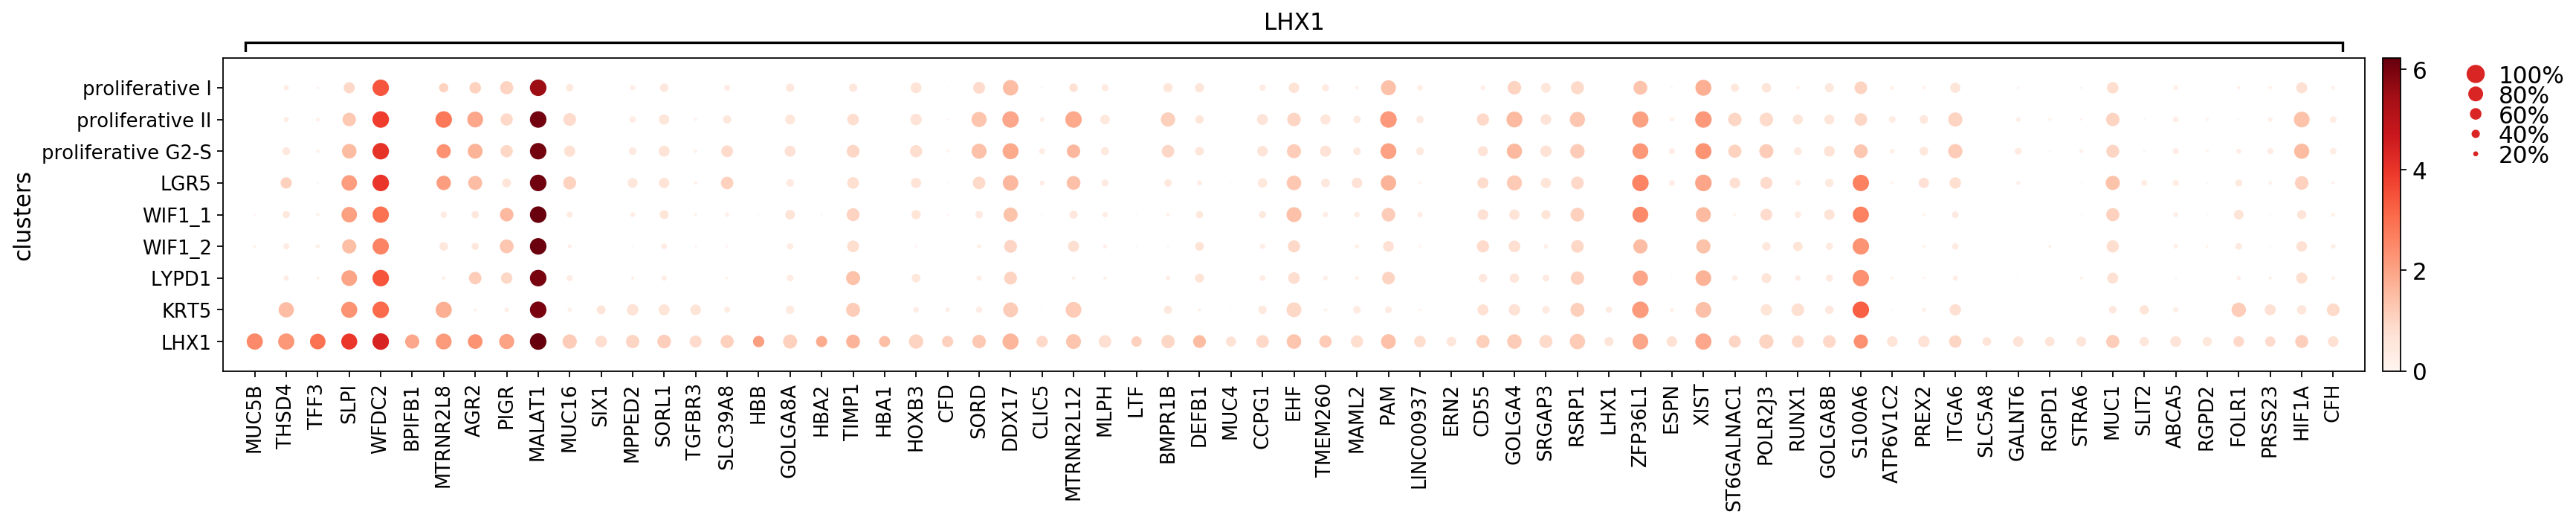

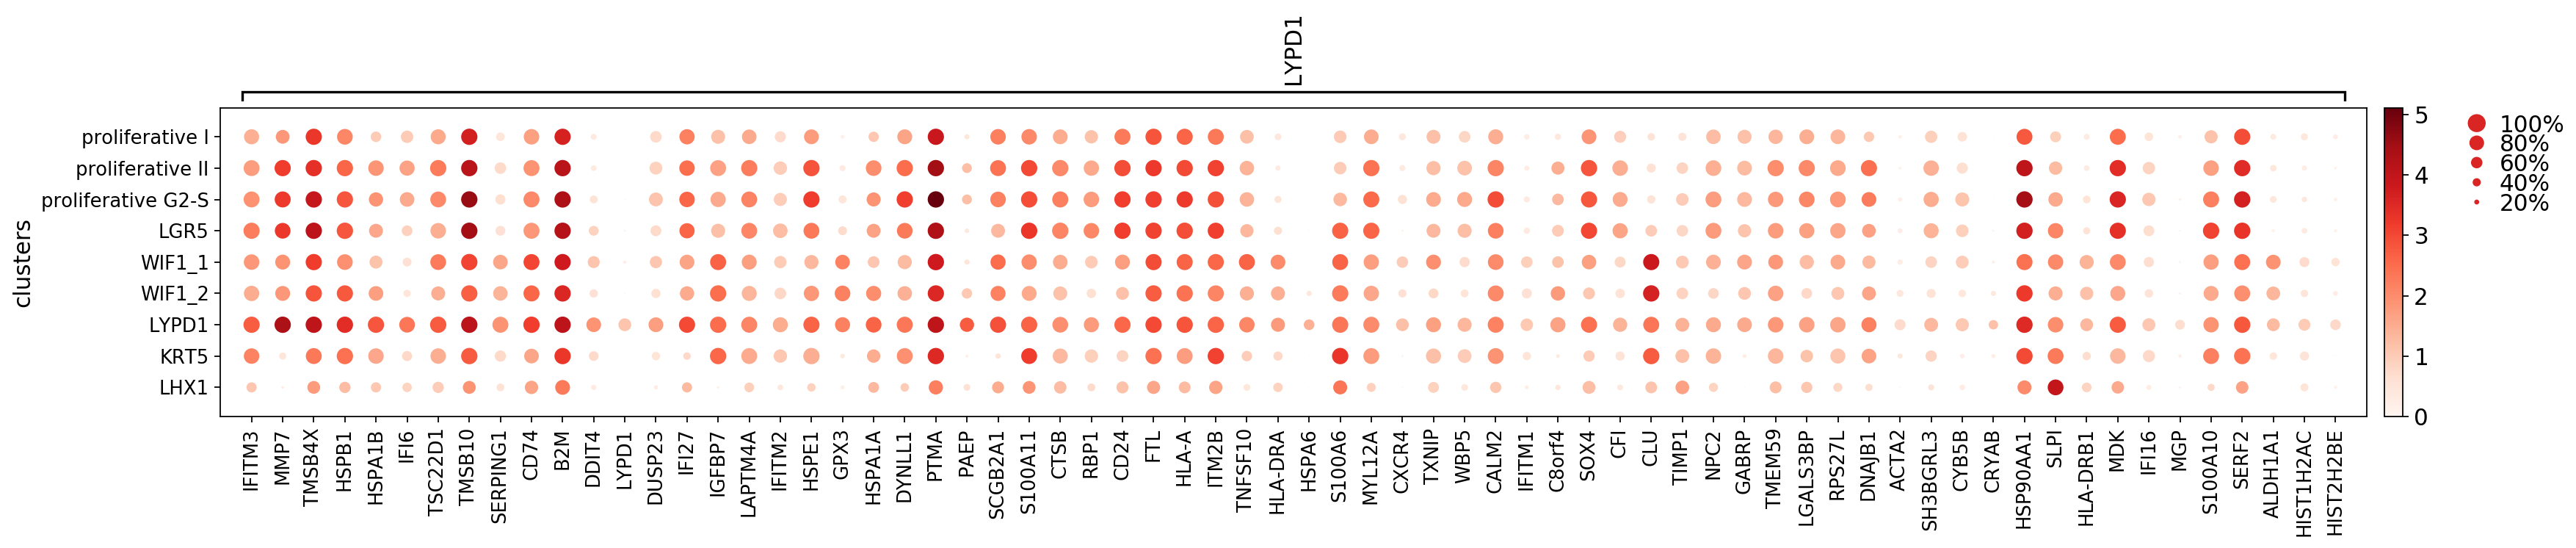

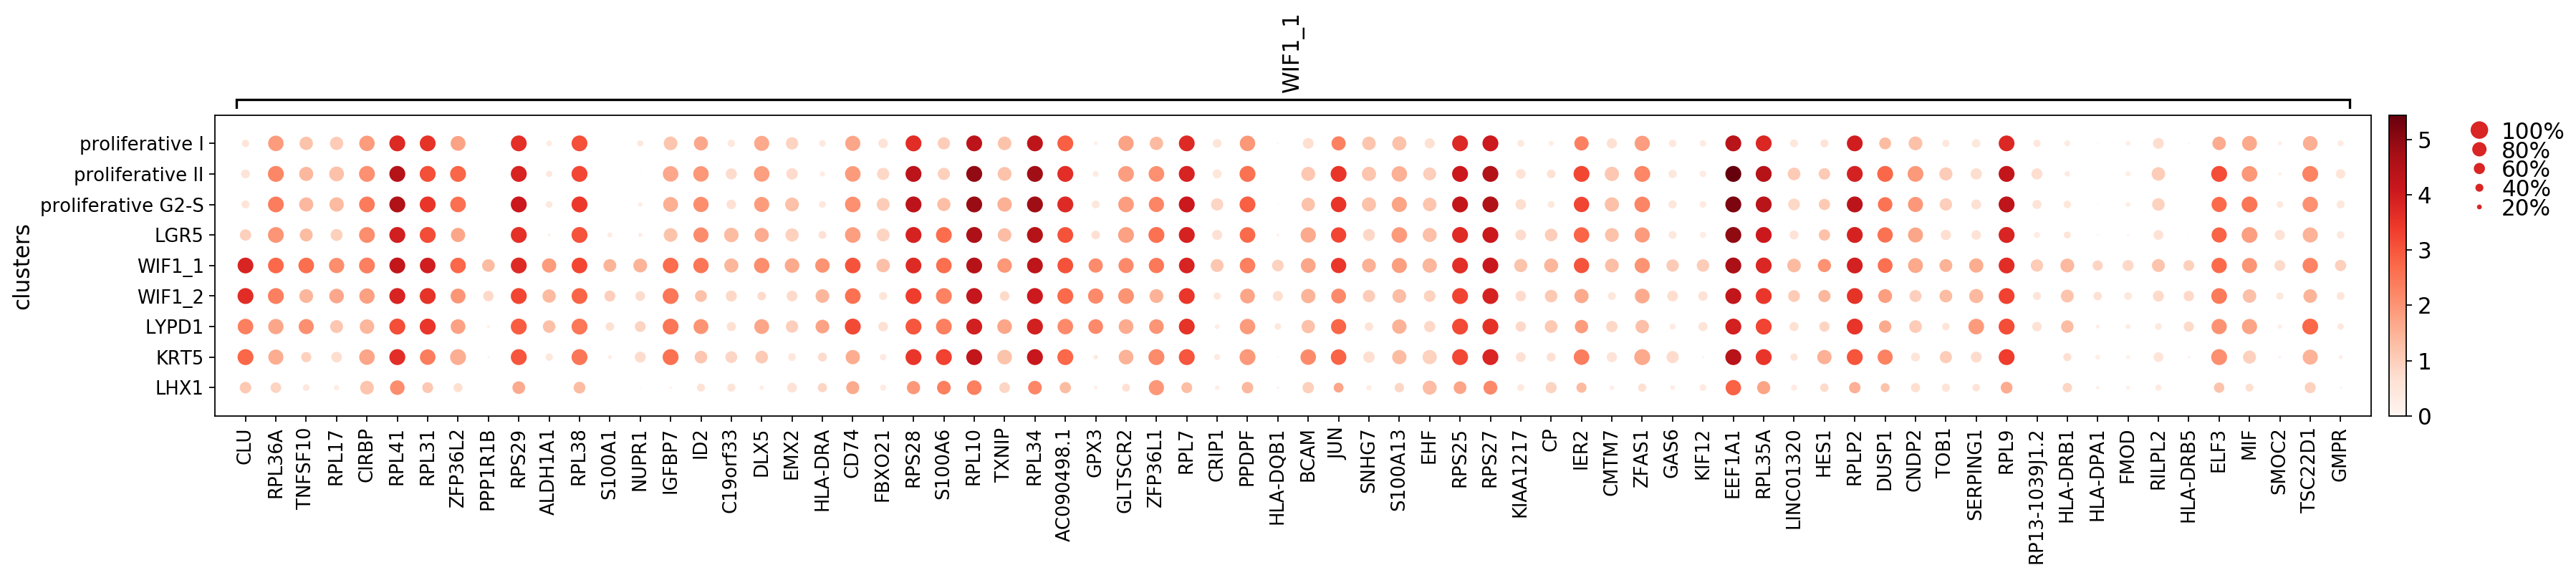

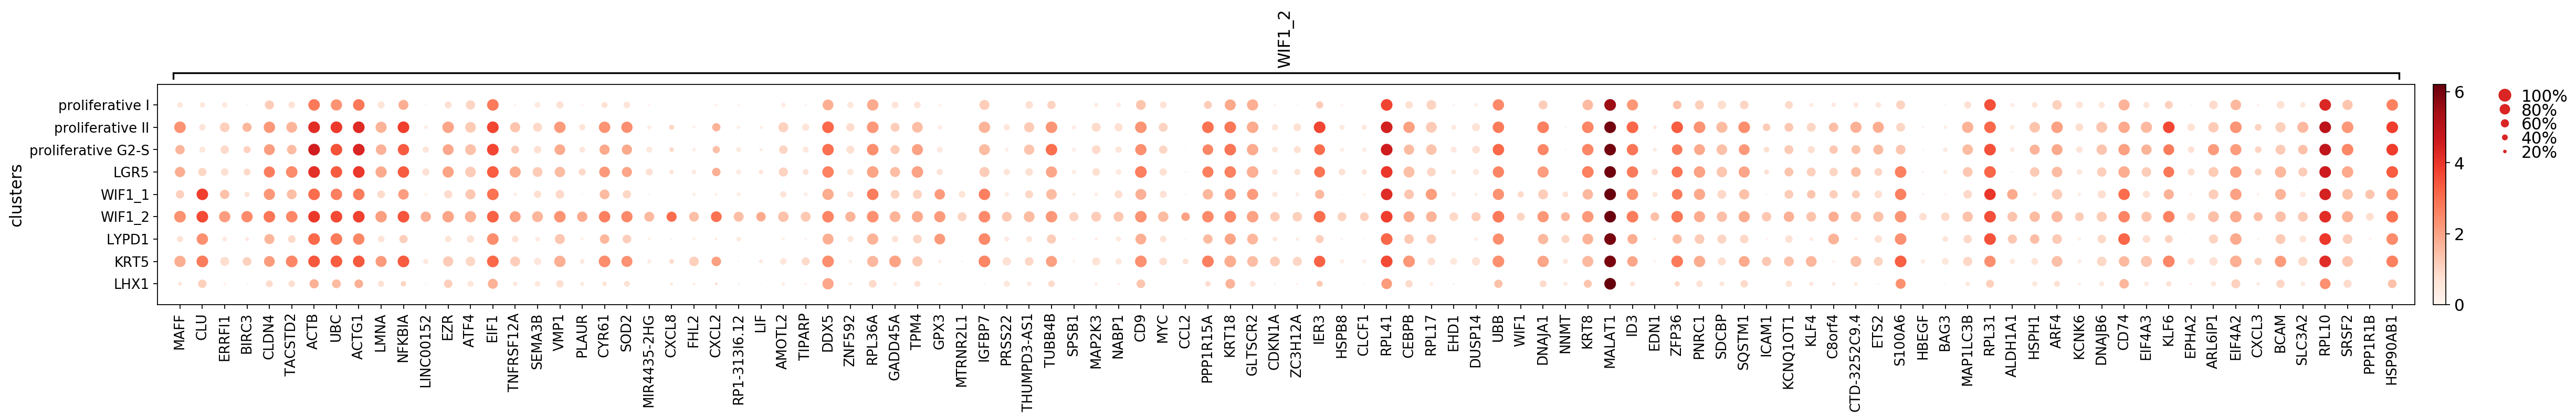

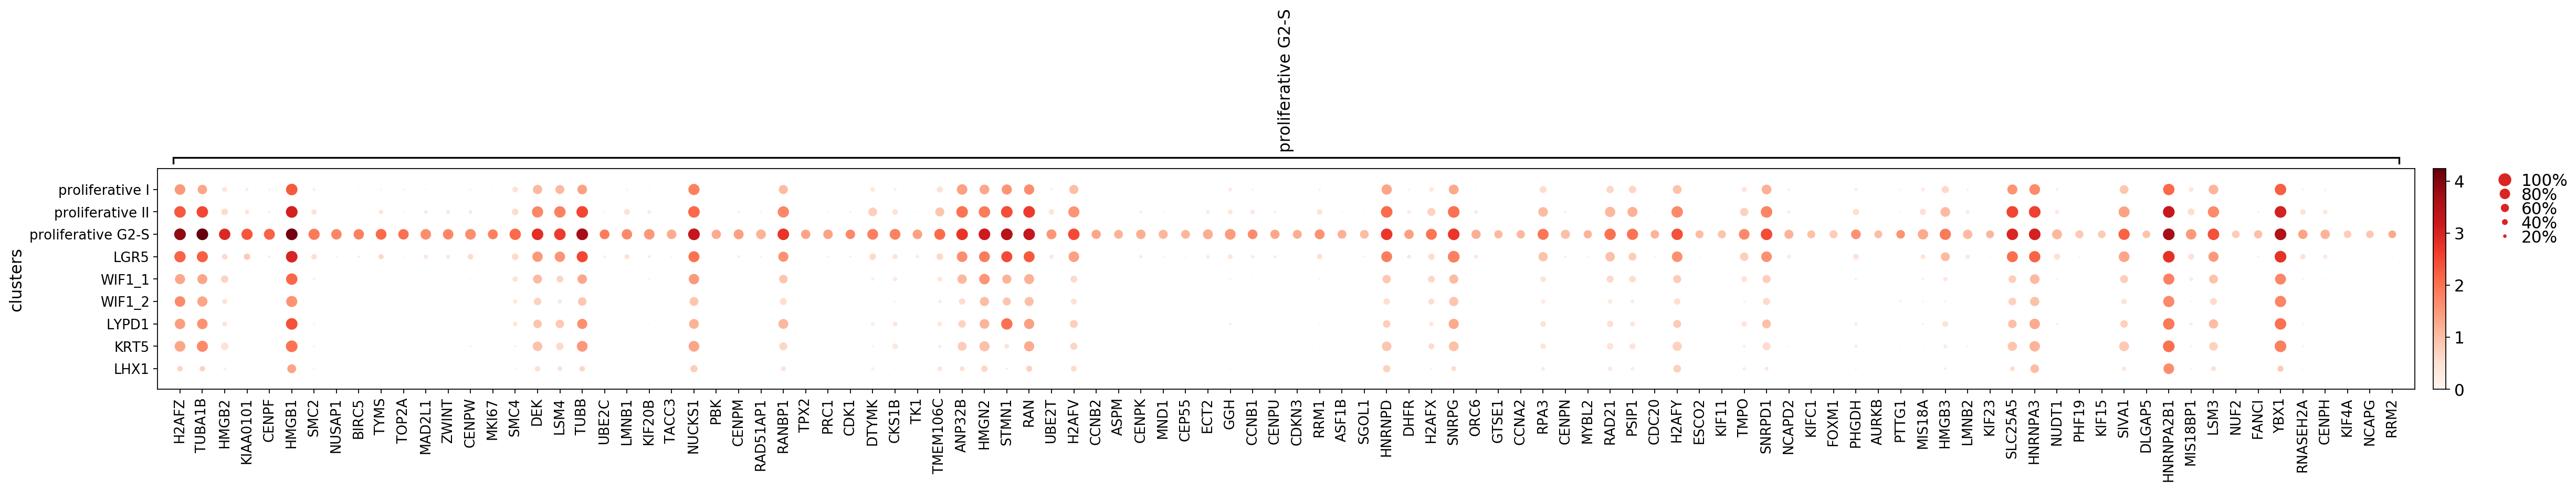

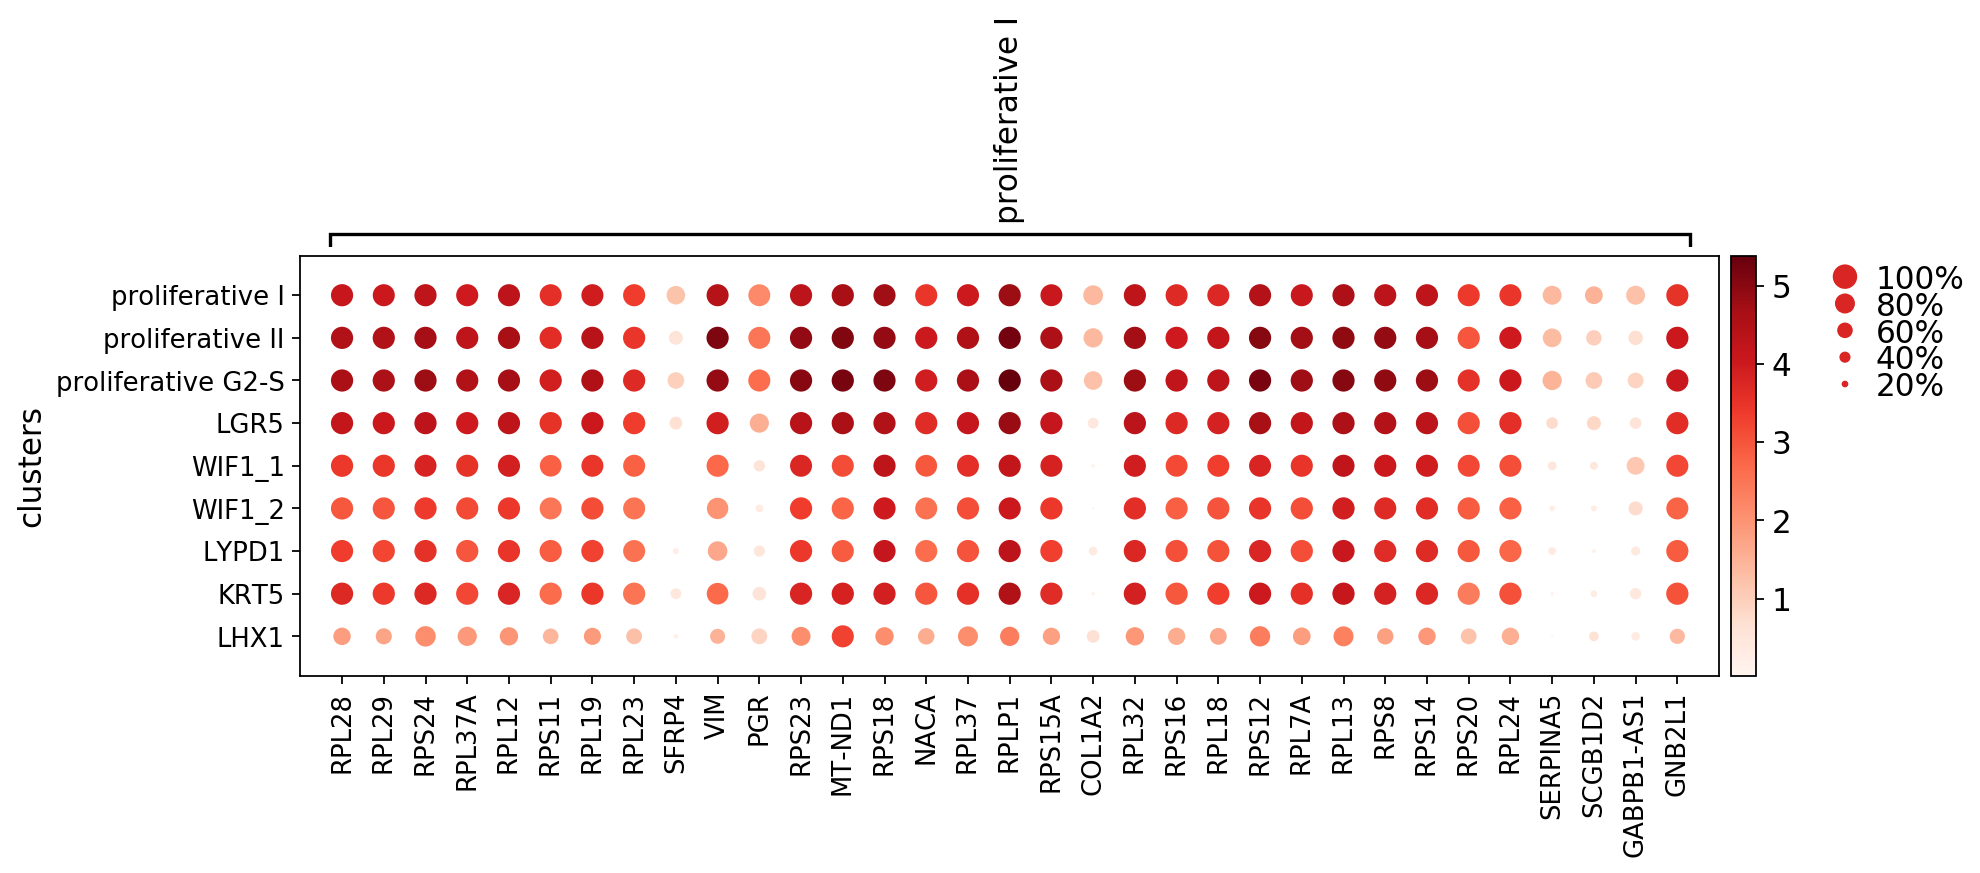

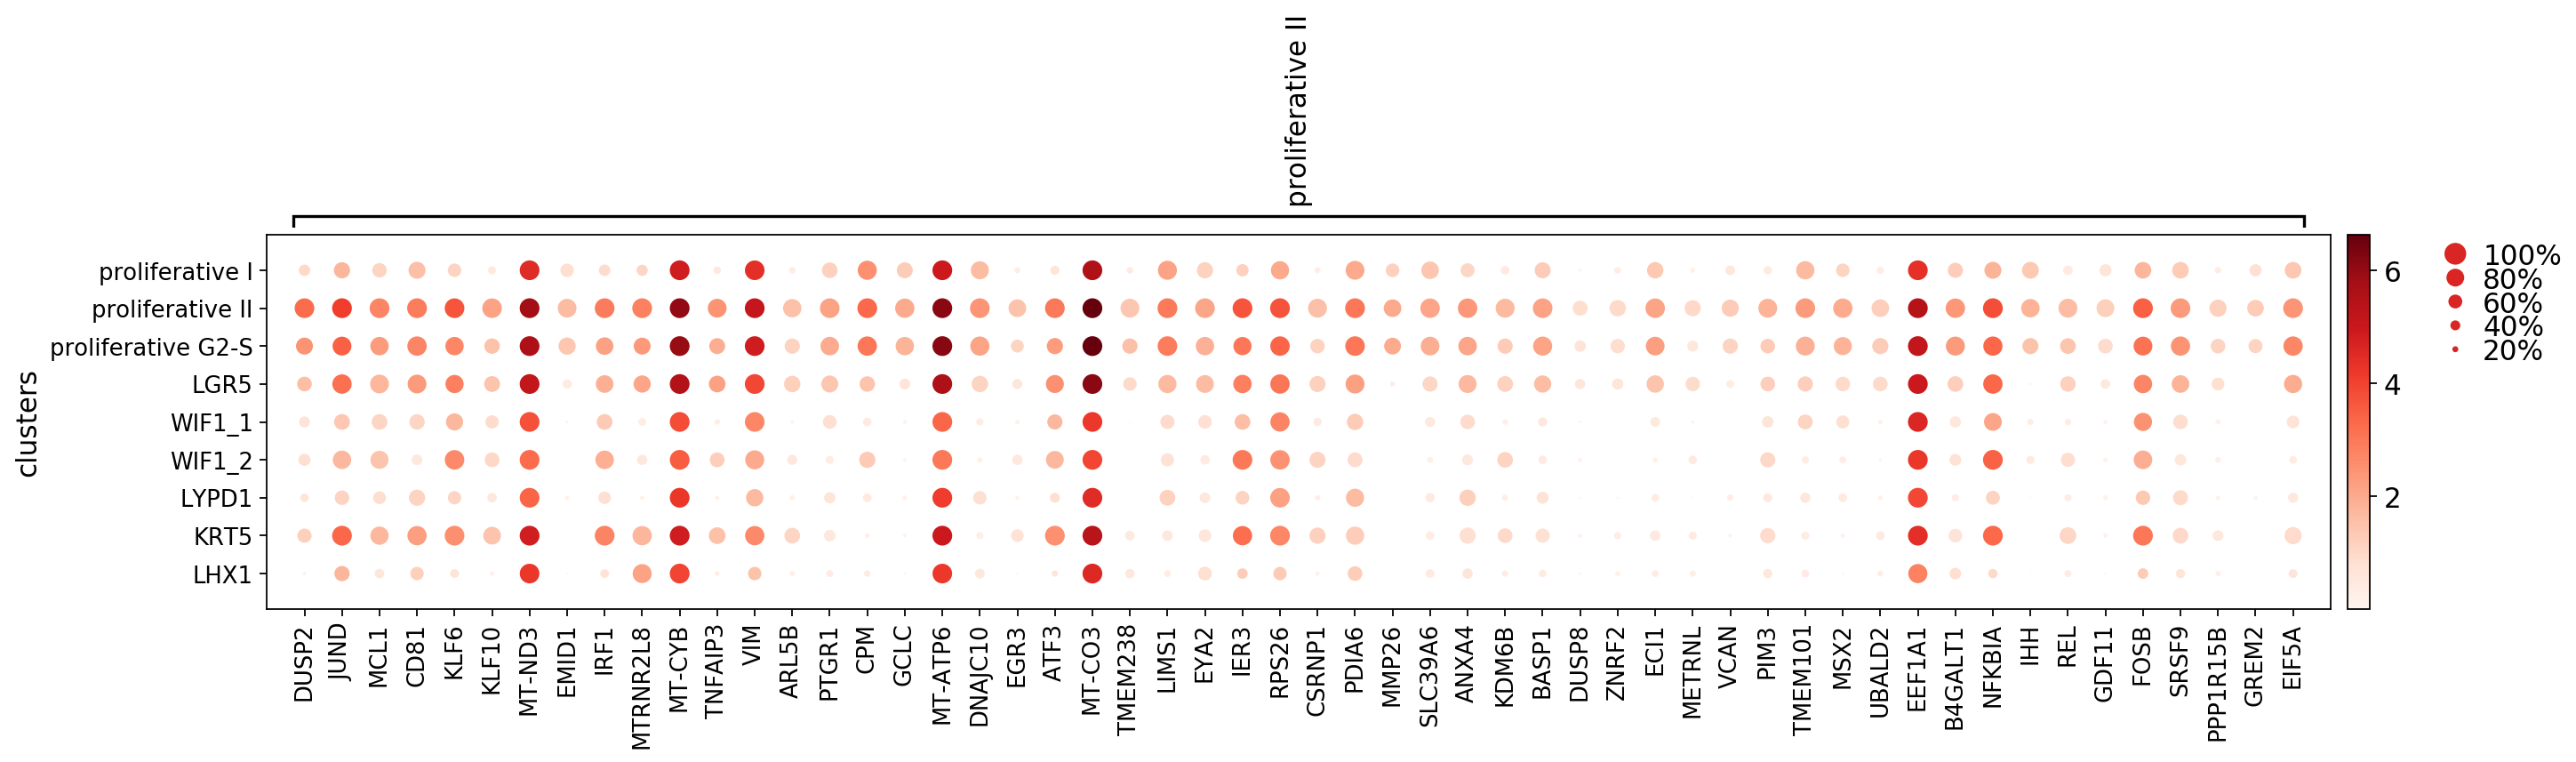

In [126]:
for clus in plot_dict:
    sc.pl.dotplot(adata, {clus: plot_dict[clus][:100]}, groupby='clusters', use_raw=True, save='_rbcde_'+clus+'.pdf')

In [127]:
# with open('figures_both_organoid/cluster_markers/top10genes_per_cluster.txt','r') as fid:
#     markers = [line.rstrip() for line in fid.readlines()]

# #make sure they're in the dataset, and sort them alphabetically for ease of finding things
# markers = [item for item in markers if item in adata_count.var_names]

# sc.pl.dotplot(adata_count, markers, groupby='clusters', dendrogram=False, save='_organoidMarkers_in_primaryEpithelialnonCiliated.pdf')